# Proyecto Final MIND

**Nombres:** ERNESTO CAMACHO ARROYAVE y LILIAN DANIELA SUÁREZ RIVEROS

El desarollo del proyecto implica tareas relacionadas con la minería de datos enmarcadas en la metodología CRISP-DM: comprensión del negocio, estudio y entendimiento de los datos, preparación de los datos, modelado, evaluación de resultados y despliegue. En el proceso de modelado-evaluación se realizarán tareas de predicción y descripción a partir de los datos elegidos. A continuación el detalle de la funcionalidad:

*Librerias necesarias para este script*

In [1]:
# Librerias para manejar datos.
import pandas as pd
import random
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# Librerias de gráficos
import matplotlib.pyplot as plt
import seaborn as sns
# Librerias para widgets
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.tree import export_graphviz
from ipywidgets import interact, interactive, fixed, interact_manual
import graphviz
import ipywidgets as widgets
from IPython.display import display
from IPython.display import SVG
# Librerias para modelos supervisados
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# Librerias para modelos no supervisados
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

**1.** *Datos Faltantes.* Si su dataset NO tiene valores faltantes debe generar un nuevo dataset con el 10% de valores faltantes aleatorios. Por el contrario, si tiene valores faltantes, debe hacer imputación por la técnica que le resulte más eficiente, y posteriormente incorporar el 10% de NA. Tenga presente que la clase no debe contener valores faltantes. A partir de ese dataset con valores faltantes debe desarrollar su proyecto.

"Predicción del tipo de cubierta forestal a partir de variables cartográficas únicamente (sin datos de teledetección). El tipo real de cubierta forestal para una observación determinada (celda de 30 x 30 metros) se determinó a partir de los datos del Sistema de Información de Recursos (RIS) de la Región 2 del Servicio Forestal de EE. UU. (USFS). Las variables independientes se derivaron de los datos obtenidos originalmente del Servicio Geológico de EE. UU. (USGS) y los datos del USFS. Los datos están en forma cruda (sin escalar) y contienen columnas binarias (0 o 1) de datos para variables independientes cualitativas (áreas silvestres y tipos de suelo).

Esta área de estudio incluye cuatro áreas silvestres ubicadas en el Bosque Nacional Roosevelt del norte de Colorado. Estas áreas representan bosques con mínimas perturbaciones causadas por el hombre, por lo que los tipos de cubierta forestal existentes son más el resultado de procesos ecológicos que de prácticas de gestión forestal.

Algunos antecedentes de estas cuatro áreas silvestres: Neota (área 2) probablemente tiene el valor de elevación promedio más alto de las 4 áreas silvestres. Rawah (área 1) y Comanche Peak (área 3) tendrían un valor de elevación medio más bajo, mientras que Cache la Poudre (área 4) tendría el valor de elevación medio más bajo."

[Fuente](https://archive.ics.uci.edu/ml/datasets/covertype)

In [2]:
dataset = pd.read_csv('dataset.csv')

In [3]:
dataset.shape

(581012, 55)

In [4]:
pd.value_counts(dataset['Cover_Type'])

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

Debido a que el conjunto de datos original tiene 55 atributos de 581012 registros, se extrajó una muestra estratificada del mismo del 5%. De manera que se conserve el mismo porcentaje por categoría de la variable respuesta en la muestra a utilizar. 

Código extraido de [GeeksForGeeks](https://www.geeksforgeeks.org/stratified-sampling-in-pandas/).

In [5]:
#dataset_muestra = dataset.groupby('Cover_Type', group_keys=False).apply(lambda x: x.sample(frac=0.05))

In [6]:
#dataset_muestra.shape

In [7]:
#pd.value_counts(dataset_muestra['Cover_Type'])

In [8]:
#dataset_muestra.to_csv('dataset_muestra.csv')

In [9]:
dataset = pd.read_csv('dataset_muestra.csv')
dataset = dataset.drop(columns = ['Unnamed: 0'])

In [10]:
pd.value_counts(dataset['Cover_Type'])

2    14165
1    10592
3     1788
7     1026
6      868
5      475
4      137
Name: Cover_Type, dtype: int64

In [11]:
dataset.shape

(29051, 55)

A continuación, la descripción de las variables.

1. Elevation: Elevación en metros (variable cuantitativa) - Medida en topografía.
2. Aspect: Aspecto en grados acimut (variable cuantitativa) - Medida en topografía.
3. Slope: Pendiente en grados (variable cuantitativa) - Medida en topografía.
4. Horizontal_Distance_To_Hydrology: Distancia horizontal a las características del agua superficial más cercanas en metros (variable cuantitativa).
5. Vertical_Distance_To_Hydrology: Distancia vertical a las características del agua superficial más cercanas en metros (variable cuantitativa).
6. Horizontal_Distance_To_Roadways: Distancia horizontal a las carreteras más cercanas en metros (variable cuantitativa).
7. Hillshade_9am: Hillshade index a las 9AM (variable cuantitativa, 0 to 255 index). 
8. Hillshade_Noon: Hillshade index al mediodía (variable cuantitativa, 0 to 255 index).
9. Hillshade_3pm: Hillshade index a las 3 PM (variable cuantitativa, 0 to 255 index). 
10. Horizontal_Distance_To_Fire_Points: Distancia horizontal a los puntos de ignición de incendios forestales más cercanos en metros (variable cuantitativa).
11. Wilderness_Area: 4 columnas binarias. 0 indica ausencia y 1 indica presente (variable cuanlitativa). Designación de área silvestre (Neota, Rawah, Comanche Peak, Cache la Poudre).
12. Soil_Type: 40 columnas binarias. 0 indica ausencia y 1 indica presente. Designación del tipo de suelo.
13. Cover_Type: 7 tipos de cobertura forestal

Se puede observar que el conjunto de datos está completo.

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29051 entries, 0 to 29050
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           29051 non-null  int64
 1   Aspect                              29051 non-null  int64
 2   Slope                               29051 non-null  int64
 3   Horizontal_Distance_To_Hydrology    29051 non-null  int64
 4   Vertical_Distance_To_Hydrology      29051 non-null  int64
 5   Horizontal_Distance_To_Roadways     29051 non-null  int64
 6   Hillshade_9am                       29051 non-null  int64
 7   Hillshade_Noon                      29051 non-null  int64
 8   Hillshade_3pm                       29051 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  29051 non-null  int64
 10  Wilderness_Area1                    29051 non-null  int64
 11  Wilderness_Area2                    29051 non-null  int64
 12  Wild

Por lo tanto, se calcula el 10% del conjunto de datos en 159.780 para generarlos.

In [13]:
dataset.shape[0]*dataset.shape[1]*0.1

159780.5

Este es el código utilizado para asignar los NA:

In [14]:
#dataset_miss = dataset.copy()

In [15]:
#for i in range(162685):
    #row = random.randint(0, 29050)
    #columns = random.randint(0, 53)
    #dataset_miss.iloco
    #[row,columns] = np.nan

In [16]:
#dataset_miss.to_csv('dataset_miss.csv')

Al finalizar la ejecución del código anterior, se leer conjunto de datos con datos faltantes.

In [17]:
dataset_miss = pd.read_csv('dataset_miss.csv')
dataset_miss = dataset_miss.drop(columns = ['Unnamed: 0','Unnamed: 0.1'])

Se observa que se obtuvo el 9.4935% de datos faltantes y por columna tiene máximo el 10.2234% de datos faltantes.

In [18]:
dataset_miss.isna().sum().sum()/(dataset.shape[0]*dataset.shape[1])*100

9.493523928138915

In [19]:
max(dataset_miss.isna().sum()/(dataset.shape[0])*100)

10.223400227186671

Cabe aclarar que todas los atributos tienen datos faltantes, excepto el target.

In [20]:
dataset_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29051 entries, 0 to 29050
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Elevation                           26224 non-null  float64
 1   Aspect                              26261 non-null  float64
 2   Slope                               26096 non-null  float64
 3   Horizontal_Distance_To_Hydrology    26180 non-null  float64
 4   Vertical_Distance_To_Hydrology      26232 non-null  float64
 5   Horizontal_Distance_To_Roadways     26122 non-null  float64
 6   Hillshade_9am                       26259 non-null  float64
 7   Hillshade_Noon                      26142 non-null  float64
 8   Hillshade_3pm                       26218 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  26224 non-null  float64
 10  Wilderness_Area1                    26230 non-null  float64
 11  Wilderness_Area2                    26100

La siguiente figura muestra como quedarón distribuidos los datos faltantes en el conjunto de datos. 

<AxesSubplot:>

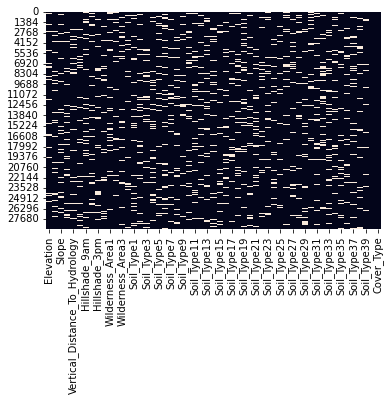

In [21]:
sns.heatmap(dataset_miss.isnull(), cbar=False)

**2.** *Exploratory Data Analysis.* EDA sobre las variables relevantes de su dataset, lo más importante es tener su explicación e interpretación de los gráficos más relevantes, las solas imágenes no sirven de nada.

**Variable respuesta**

Inicialmente, mediante un diagrama de barras, exploramos la cantidad de observaciones para las categorías de la variable respuesta (tipos de coberturas).

Código extraido de [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)

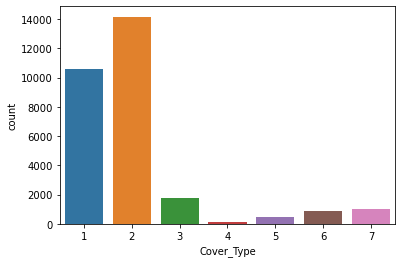

In [22]:
sns.countplot(data = dataset_miss, x = 'Cover_Type')
plt.show()

Por lo tanto, las categorías 1 y 2 son las que más observaciones tienen, dominando frente a las otros tipos de cobertura.

**Variables cuantitativas**

Ahora bien, podría haber valor en explorar las variables cuantitativas, para el caso:

- Elevation
- Aspect
- Slope
- Horizontal_Distance_To_Hydrology
- Vertical_Distance_To_Hydrology
- Horizontal_Distance_To_Roadways
- Hillshade_Noon
- Hillshade_3pm
- Horizontal_Distance_To_Fire_Points

De acuerdo con el heat map, podemos concluir que:
- Las variables *Aspect* y *Hillshape_3pm* tienen una correlación positiva relativamente alta (0,65).
- Las variables *Hillshape_9am* y *Hillshape_3pm* tienen una correlación negativa relativamente alta (-0,77).

In [23]:
numerics = dataset_miss.iloc[:,0:10]

Código extraido de [heatmap](https://datatofish.com/correlation-matrix-pandas/).

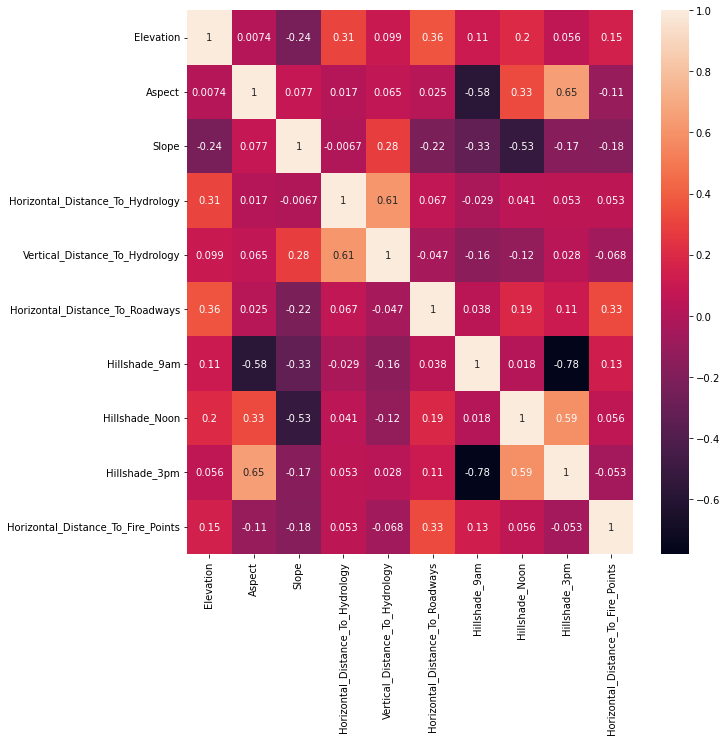

In [24]:
fig, ax = plt.subplots(figsize=(10,10))  
corrMatrix = numerics.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

A continuación, veremos boxplot sobre las variables numericas, y su relacion sobre el tipo de cobertura.

In [25]:
dataset_miss.Cover_Type = dataset_miss.Cover_Type.astype('category')

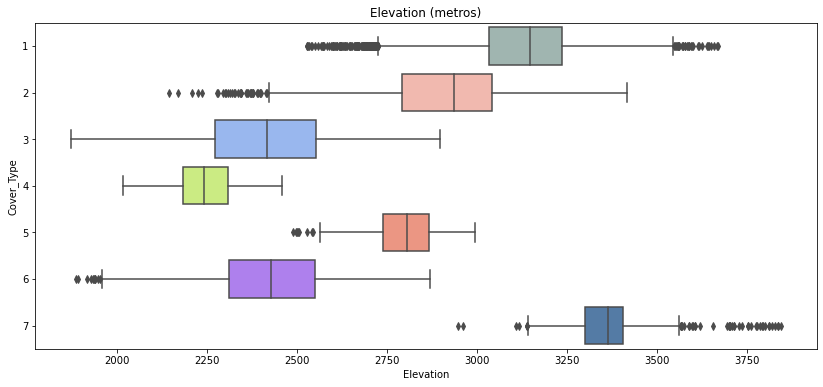

In [26]:
plt.figure(figsize=(14,6))
sns.boxplot(y = 'Cover_Type', x = 'Elevation', data = dataset_miss, palette = ['#9CB8B2','#FCB1A4',
            '#8BB3FC','#D2FC72','#FC8B72','#AB6EFF','#467BB3']).set(title='Elevation (metros)')
#plt.savefig("Elevation-Boxplot.jpg")
plt.show()

Para la variable *elevation*, las distribuciones están ligeramente sesgadas a la izquierda para los tipos de cobertura 1, 2 y 7. Mientras los otros tipos tienden a ser simétricos. La media para los tipos de cobertura son aproximadamente 3125, 2937, 2437, 2250, 2687, 2437 y 3125 metros, respectivamente. Casi todos los tipos de cobertura tienen valores atípicos, excepto el tipo 3 y 4. 

Se presentan una diferenciación entre las distribuciones de la elevación por tipo de cobertura. La elevación es más alta para tipos 1 y 7, es medio para tipos 2 y 5 y es bajo para tipos 3, 4 y 6.

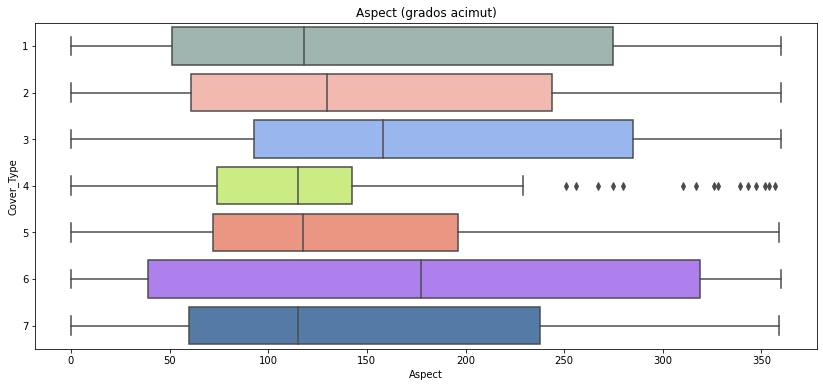

In [27]:
plt.figure(figsize=(14,6))
sns.boxplot(y = 'Cover_Type', x = 'Aspect', data = dataset_miss, palette = ['#9CB8B2','#FCB1A4',
            '#8BB3FC','#D2FC72','#FC8B72','#AB6EFF','#467BB3']).set(title='Aspect (grados acimut)')
plt.show()

Para la variable *aspect*, los aspect son similares para los tipos de cobertura 1, 4, 5 y 7, pero 1 y 7 son más variables que 4 y 5. En general, esta variable diferenciada por tipo de cobertura tiene mucha dispensión, excepto po el tipo 4, aunque este tipo tiene valores atípicos. Las distribuciones están sesgadas a la derecha para los tipos de cobertura 1, 2, 3, 5 y 7. Mientras los otros tipos tienden a ser simétricos.

Los grados acimut son bajos para los tipos de cobertura 4 y 5, donde el 75% de los valores son menores o iguales que 112 para el tipo 4 y menores o iguales que 188 para tipo 5.

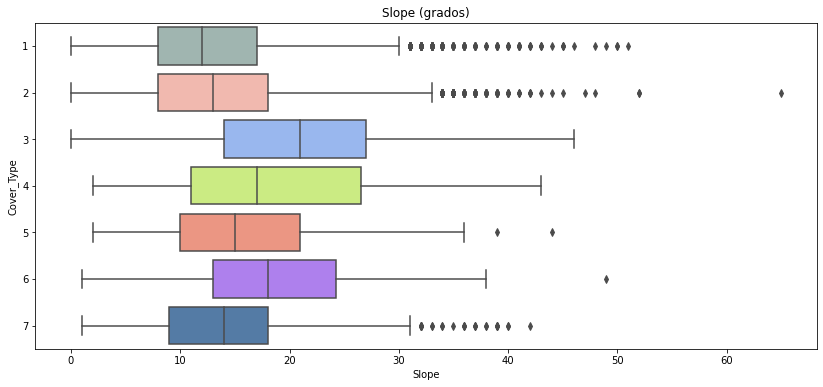

In [28]:
plt.figure(figsize=(14,6))
sns.boxplot(y = 'Cover_Type', x = 'Slope', data = dataset_miss, palette = ['#9CB8B2','#FCB1A4',
            '#8BB3FC','#D2FC72','#FC8B72','#AB6EFF','#467BB3']).set(title='Slope (grados)')
plt.show()

Para la variable *Slope*, las medias son distintas para cada tipo de cobertura y las variación es similar. Casi los tipos de cobertura tienen valores atípicos, excepto el tipo 3 y 4.

Los grados son bajos en general, aunque más para los tipos 1, 2 y 7. El 75% de los grados para todos los tipos de cobertura están por debajo de 27. 

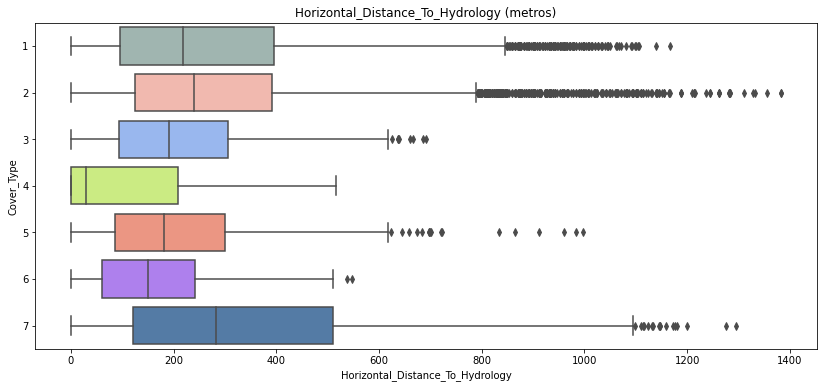

In [29]:
plt.figure(figsize=(14,6))
sns.boxplot(y = 'Cover_Type', x = 'Horizontal_Distance_To_Hydrology', data = dataset_miss, palette = ['#9CB8B2','#FCB1A4',
            '#8BB3FC','#D2FC72','#FC8B72','#AB6EFF','#467BB3']).set(title='Horizontal_Distance_To_Hydrology (metros)')
plt.show()

Para la variable *Horizontal Distance To Hydrology*, las distribuciones están ligeramente sesgadas a la derecha para los tipos de cobertura 1, 2 y 7 y notablemente sesgada a la derecha para el tipo de cobertura 4. Mientras los otros tipos tienden a ser simétricos. Casi los tipos de cobertura tienen valores atípicos, excepto el tipo 4 y todos los tipos de cobertura se distribuye en los mismos valores.

La distancia horizontal a área superficial es menor para el tipo 4 y mayor para el tipo 2 y 7. 

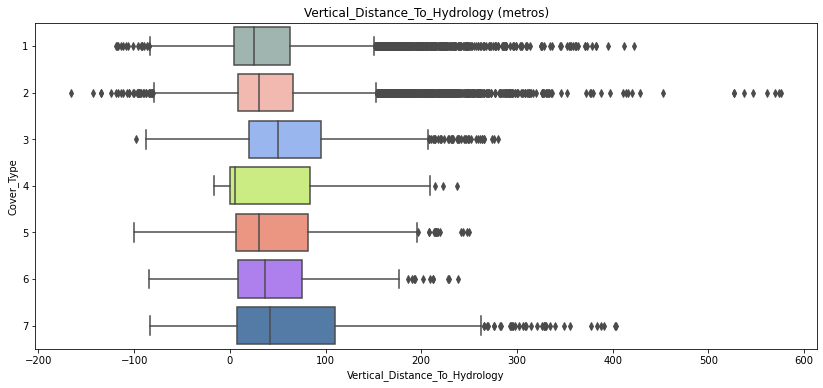

In [30]:
plt.figure(figsize=(14,6))
sns.boxplot(y = 'Cover_Type', x = 'Vertical_Distance_To_Hydrology', data = dataset_miss, palette = ['#9CB8B2','#FCB1A4',
            '#8BB3FC','#D2FC72','#FC8B72','#AB6EFF','#467BB3']).set(title='Vertical_Distance_To_Hydrology (metros)')
plt.show()

Para la variable *Vertical Distance To Hydrology*, las medias son similares para los tipos de cobertura 1, 2, 5, 6 y 7, mientras que la media de la cobertura 3 y 4 son distintas. La variación es similar para todos los tipos de cobertura. Todos los tipos de cobertura tienen valores atípicos.

Todos los tipos de cobertura están a una distancia vertical muy similar a área superficial de agua.

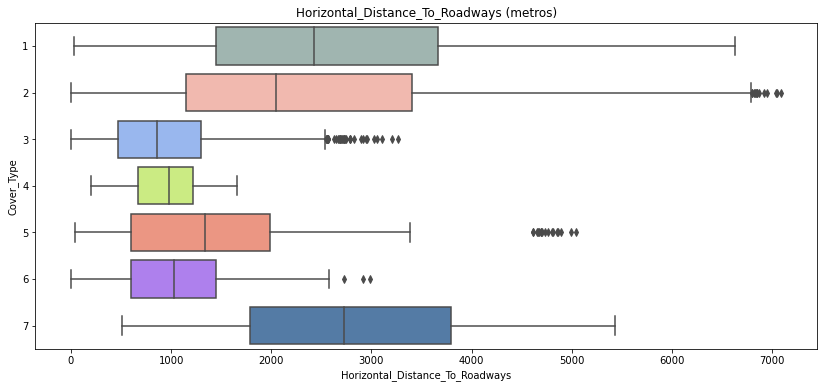

In [31]:
plt.figure(figsize=(14,6))
sns.boxplot(y = 'Cover_Type', x = 'Horizontal_Distance_To_Roadways', data = dataset_miss, palette = ['#9CB8B2','#FCB1A4',
            '#8BB3FC','#D2FC72','#FC8B72','#AB6EFF','#467BB3']).set(title='Horizontal_Distance_To_Roadways (metros)')
plt.show()

Para la variable *Horizontal Distance To Roadways*, tienen mucha variación son similares para los tipos de cobertura 1, 2 y 7, de igual manera para 3, 4, 5 y 6. Los valores atípicos están en los tipos 2, 3, 5 y 6. Se presentan una diferenciación entre las distribuciones de la distancia por tipo de cobertura.

La distancia a la carretera es menor para los tipos de cobertura 3, 4, 5 y 6, mientras que es mayor para los tipos de cobertura 1, 2  y 7.

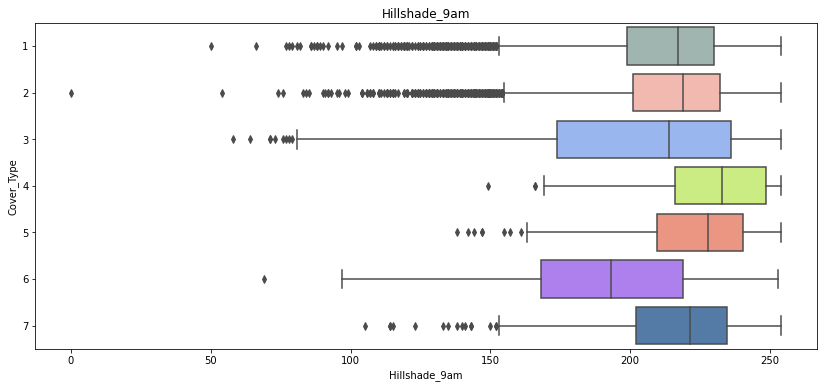

In [32]:
plt.figure(figsize=(14,6))
sns.boxplot(y = 'Cover_Type', x = 'Hillshade_9am', data = dataset_miss, palette = ['#9CB8B2','#FCB1A4',
            '#8BB3FC','#D2FC72','#FC8B72','#AB6EFF','#467BB3']).set(title='Hillshade_9am')
plt.show()

Para la variable *Hillshade 9am*, tiene mucha variación en los tipos de cobertura 3 y 6, mientras los demás tienen menos y similar variación. Se presentan una poca diferenciación entre las medias del índice de sombreado por tipo de cobertura. 

A las 9 am, los tipos de cobertura tienden a tener un índice de sombreado más alto, es decir, es más brillante. Aunque, los tipos de 3 y 6 prefieren se un poco más oscuros a está hora.

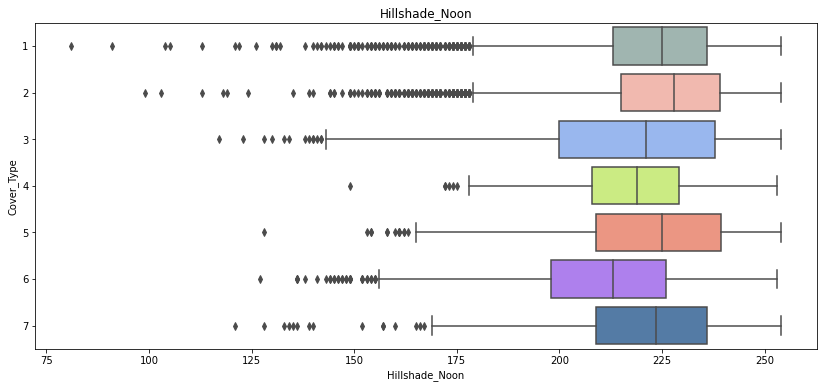

In [33]:
plt.figure(figsize=(14,6))
sns.boxplot(y = 'Cover_Type', x = 'Hillshade_Noon', data = dataset_miss, palette = ['#9CB8B2','#FCB1A4',
            '#8BB3FC','#D2FC72','#FC8B72','#AB6EFF','#467BB3']).set(title='Hillshade_Noon')
plt.show()

Para la variable *Hillshade Noon*, tiene mucha variación en el tipo de cobertura 3, mientras los demás tienen menos y similar variación. Se presentan una poca diferenciación entre las medias del índice de sombreado por tipo de cobertura.

Al mediodía, los tipos de cobertura tienden a tener un índice de sombreado más alto pero no tanto como a las 9 am, es decir, es más brillante. Aunque, los tipos de 1, 3, 4 y 6 prefieren ser un poco más oscuros a está hora.

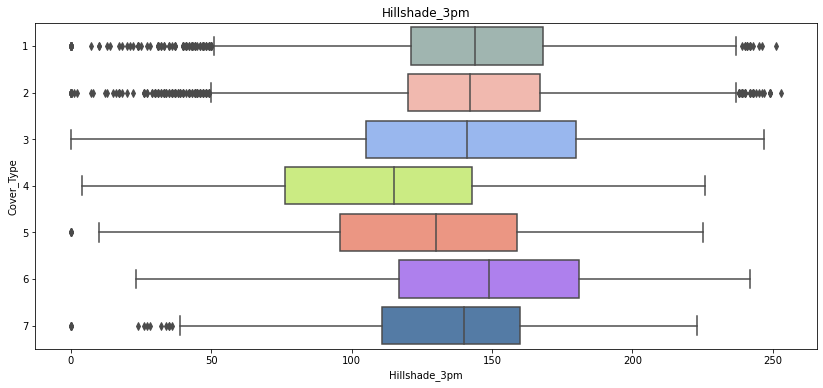

In [34]:
plt.figure(figsize=(14,6))
sns.boxplot(y = 'Cover_Type', x = 'Hillshade_3pm', data = dataset_miss, palette = ['#9CB8B2','#FCB1A4',
            '#8BB3FC','#D2FC72','#FC8B72','#AB6EFF','#467BB3']).set(title='Hillshade_3pm')
plt.show()

Para la variable *Hillshade 3pm*, se presentan una poca diferenciación entre las medias del índice de sombreado para los tipos de cobertura 1, 2, 3 y 6. La mayor variación esta en los tipos de cobertura 3 y 4.

A las 3 pm, los tipos de cobertura tienden a tener un índice de sombreado medio, es decir, es más promdio brillante y oscuro. Aunque, los tipos de 3 y 6 son más oscuros y 4 y 5 son más brillantes a está hora.

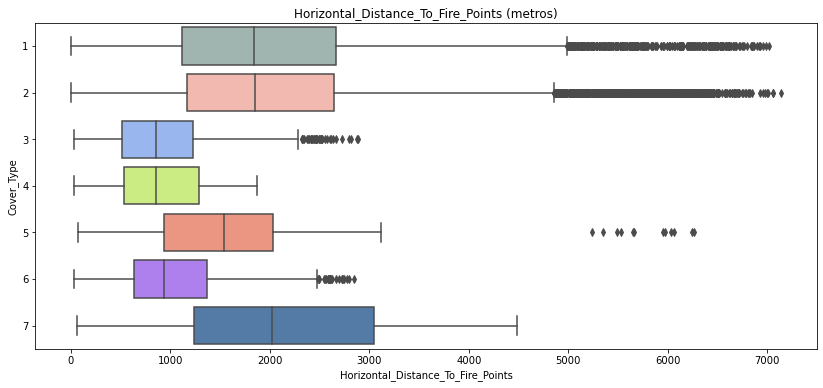

In [35]:
plt.figure(figsize=(14,6))
sns.boxplot(y = 'Cover_Type', x = 'Horizontal_Distance_To_Fire_Points', data = dataset_miss, palette = ['#9CB8B2','#FCB1A4',
            '#8BB3FC','#D2FC72','#FC8B72','#AB6EFF','#467BB3']).set(title='Horizontal_Distance_To_Fire_Points (metros)')
plt.show()

Para la variable *Horizontal Distance To Fire Points*, tiene distribuciones sesgado a la izquierda para los tipos de cobertura 3, 4 , 6 y 7, mientras el resto tienden a ser simétricas. La distancia a puntos de fuego es mayor para los tipos de cobertura 1, 2 y 7, medio para el tipo 5 y bajo para los tipos 3, 4 y 6.

En conlusión, para los boxplot:
- La elevación para cada tipo de cobertura se concentra en valores distintos, por lo que se podría pensar que caracteriza los mismos.
- En general, las distancias a agua superficial horizonal tienden a ser más grandes que las verticales.
- En general, las distancias horizontales a la carretera son más grandes que las distancias horizontales a agua superficial, pero tienen el mismo comportamiento para los tipos de cobertura. Es decir, es grande para tipo 1, 2 y 7; medio para tipo 5 y bajo para tipo 3, 4 y 5. 

**Variables cualitativas**

Los *pie chart* representan las proporciones de presencia o ausencis de las áreas silvestres en las observaciones del conjunto de datos. Es importante mencionar que el de la izquierda, muestra los porcentages de ausencia del tipo de área silvestre indicada en los tipos de cobertura y el de la derecha es la presencia del tipo de área silvestre indicada en los tipos de cobertura.

Código extraido de [Pie Chart](https://stackoverflow.com/questions/50449628/how-to-remove-0-from-pie-chart).

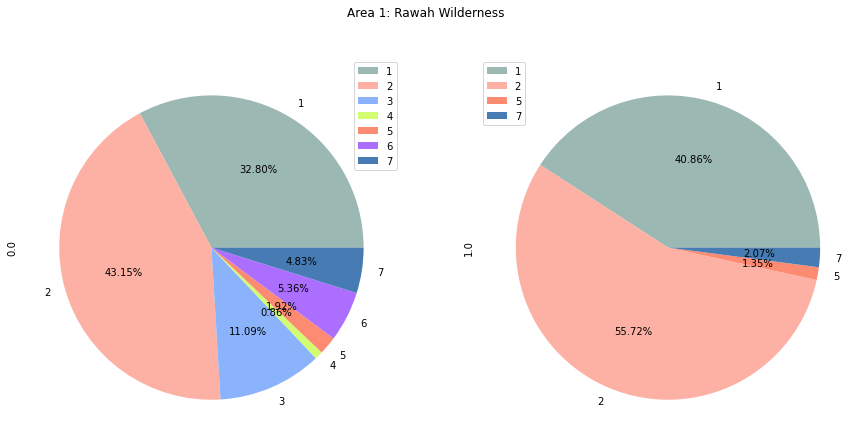

In [36]:
dataset_miss.groupby('Cover_Type').Wilderness_Area1.value_counts().unstack().plot.pie(colors = ['#9CB8B2','#FCB1A4',
            '#8BB3FC','#D2FC72','#FC8B72','#AB6EFF','#467BB3'], title = 'Area 1: Rawah Wilderness',
            subplots = True, autopct = lambda p:"{:.2f}%".format(p) if p > 0 else '', figsize = (15,7))
plt.show()

Del gráfico del área 1, podriamos concluir que:
- Los tipo de cobertura 3, 4 y 6 carecen del área de tipo 1.
- De las observaciones que cuentan con área de tipo 1, el 55.72% está en la cobertura de tipo 2, el 40.86% está en la cobertura de tipo 1, el 2.07% está en la cobertura y el 1.35% está en la cobertura 5.

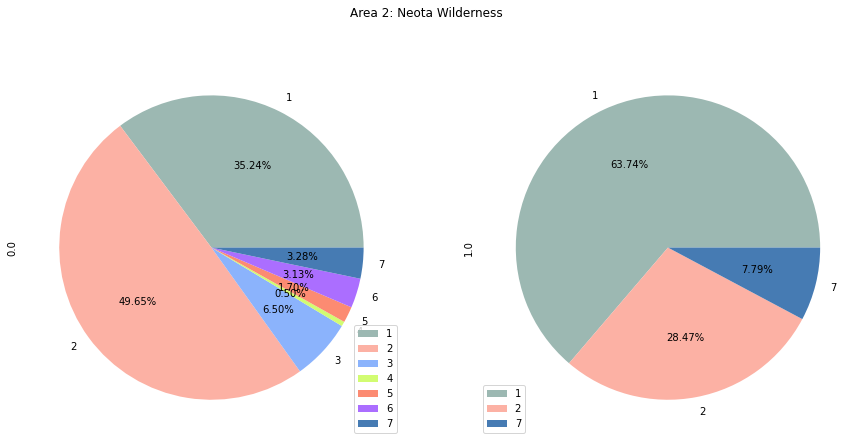

In [37]:
dataset_miss.groupby('Cover_Type').Wilderness_Area2.value_counts().unstack().plot.pie(colors = ['#9CB8B2','#FCB1A4',
            '#8BB3FC','#D2FC72','#FC8B72','#AB6EFF','#467BB3'], title = 'Area 2: Neota Wilderness',
            subplots = True, autopct = lambda p:"{:.2f}%".format(p) if p > 0 else '', figsize = (15,7))
plt.show()

Del gráfico del área 2, podriamos concluir que:
- Los tipo de cobertura 3, 4, 5 y 6 carecen del área de tipo 2.
- De las observaciones que cuentan con área de tipo 2, el 63.74% está en la cobertura de tipo 1, el 28.47% está en la cobertura de tipo 2 y el 7.79% está en la cobertura 7.

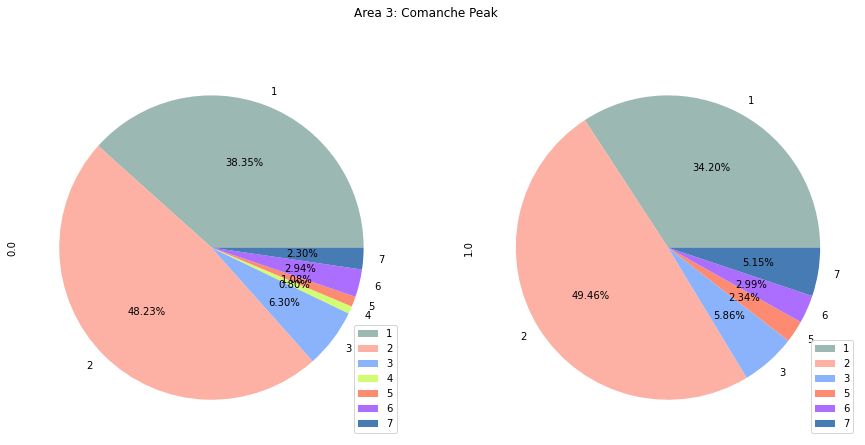

In [38]:
dataset_miss.groupby('Cover_Type').Wilderness_Area3.value_counts().unstack().plot.pie(colors = ['#9CB8B2','#FCB1A4',
            '#8BB3FC','#D2FC72','#FC8B72','#AB6EFF','#467BB3'], title = 'Area 3: Comanche Peak',
            subplots=True, autopct = lambda p:"{:.2f}%".format(p) if p > 0 else '', figsize=(15,7))
plt.show()

Del gráfico del área 3 podriamos concluir que:
- Los tipo de cobertura 3, 4, 5 y 6 carecen del área de tipo 3.
- De las observaciones que cuentan con área de tipo 3, el 49.46% está en la cobertura de tipo 2, el 34.20% está en la cobertura de tipo 1, el 5.86% está la cobertura 3, el 5.15% está en la cobertura 7, el 2.99% está en la cobertura 6 y el 2.34 % está en la cobertura 5.

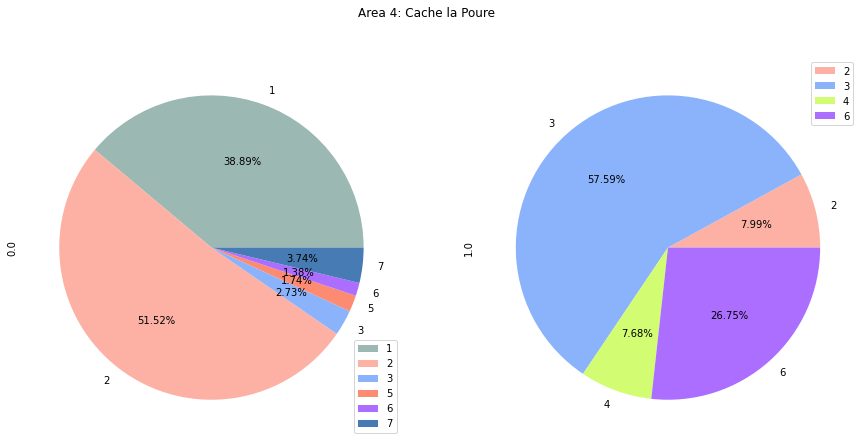

In [39]:
dataset_miss.groupby('Cover_Type').Wilderness_Area4.value_counts().unstack().plot.pie(colors = ['#9CB8B2','#FCB1A4',
            '#8BB3FC','#D2FC72','#FC8B72','#AB6EFF','#467BB3'], title = 'Area 4: Cache la Poure',
            subplots = True, autopct = lambda p:"{:.2f}%".format(p) if p > 0 else '', figsize = (15,7))
plt.show()

Del gráfico del área 4 podriamos concluir que:
- Los tipo de cobertura 1, 5 y 6 carecen del área de tipo 4.
- De las observaciones que cuentan con área de tipo 4, el 57.59% está en la cobertura de tipo 3, el 26.75% está en la cobertura de tipo 6, el 7.99% está la cobertura 2 y el 7.68% está en la cobertura 4.

Como podemos observar hay solo graficos en los que la presencia del área implica que se eliminan posibilidades de tipos de cobertura, por lo que podriamos concluir que la presencia o no del area es relevante para la clasificacion del tipo de cobertura.

Por otro lado, se extrajo una tabla con la cantidad de observaciones que presentan cada tipo de área silvestre por tipo de cobertura.

In [40]:
data = dataset_miss.groupby(by = ['Wilderness_Area1','Cover_Type'], group_keys=False).size().reset_index()
data = data[data.Wilderness_Area1 == 1].drop(columns = ['Wilderness_Area1'])
data.columns = ['Cover_Type','Wilderness_Area1'] 

In [41]:
for i in range(2,5):
    name = 'Wilderness_Area'+str(i)
    base = dataset_miss.groupby(by = [name,'Cover_Type'], group_keys=False).size().reset_index()
    base = base[base[name] == 1].drop(columns = [name])
    base.columns = ['Cover_Type',name] 
    data = data.merge(base,how = 'outer')

In [42]:
data = data.sort_values(by = 'Cover_Type', ascending = True)
data = data.replace(np.nan,0)
data = data.drop(columns = ['Cover_Type'])
data.index = [1,2,3,4,5,6,7]

Posteriormente, se realizo un diagrama de barras apiladas que permite ver que los tipos de cobertura 1, 2, 5 y 7 tienen más observaciones con tipo de área 1 y 3, mientras que los tipos de cobertura 3 y 6 tienen más observaciones con tipo de área 3 y 4. Igualmente, el tipo de cobertura 4 solo tiene tipo de área 4 y el tipo de área 2 está únicamente presente en tipo de cobertura 1,2 y 7.

Código extraido de [gráfico apilado](https://www.delftstack.com/es/howto/matplotlib/stack-bar-plots-matplotlib/).

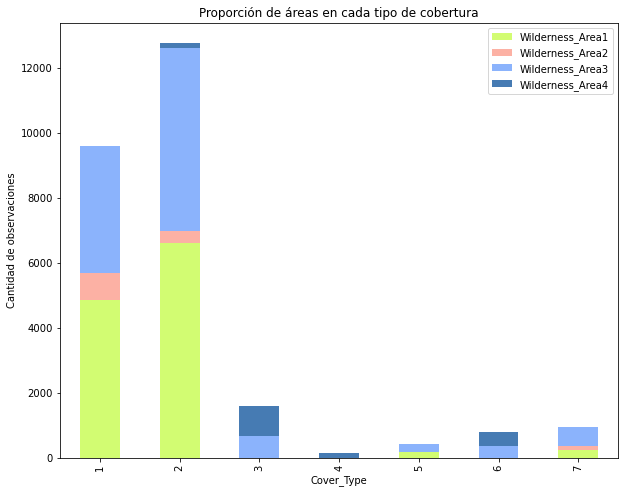

In [43]:
data.plot(kind="bar",stacked=True,figsize=(10,8),color = ['#D2FC72','#FCB1A4',
            '#8BB3FC','#467BB3'],title = 'Proporción de áreas en cada tipo de cobertura', xlabel = 'Cover_Type',
          ylabel = 'Cantidad de observaciones')
#plt.savefig("Areas-apilado.jpg")
plt.show()

Para los tipos de suelo, se extrajo una tabla con la cantidad de observaciones que tienen presencia de cada tipo de suelo por tipo de cobertura.

Código extraido del Parcial 1 entregado por Lilian Suárez.

In [44]:
data = dataset_miss.groupby(by = ['Soil_Type1','Cover_Type'], group_keys=False).size().reset_index()
data = data[data.Soil_Type1 == 1].drop(columns = ['Soil_Type1'])
data.columns = ['Cover_Type','Amount_Soil'] 
data['Soil_Type'] = np.repeat('1',data.shape[0])

In [45]:
for i in range(2,41):
    name = 'Soil_Type'+str(i)
    base = dataset_miss.groupby(by = [name,'Cover_Type'], group_keys=False).size().reset_index()
    base = base[base[name] == 1].drop(columns = [name])
    base.columns = ['Cover_Type','Amount_Soil'] 
    base['Soil_Type'] = np.repeat(str(i),base.shape[0])
    data = pd.concat([data,base],axis = 0)

Luego, se realizo unos diagramas de barra por tipo de cobertura con el top 10 de tipos de suelo para cada uno.

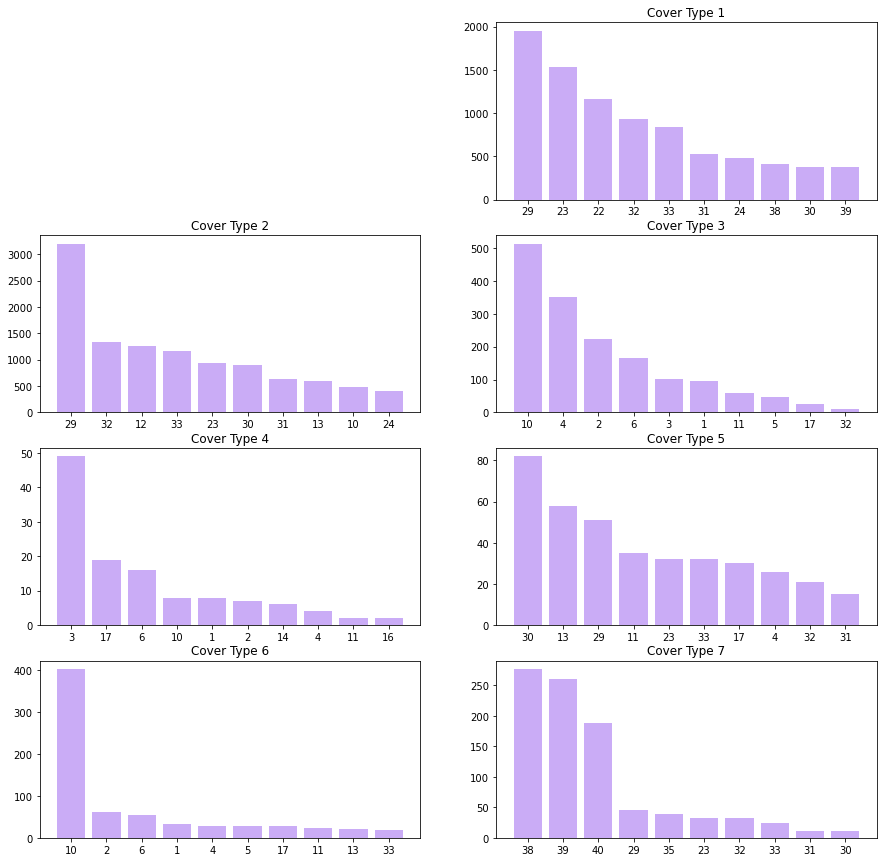

In [46]:
plt.figure(figsize = (15,15))
for i in range(1,8):
    plt.subplot(4, 2, i+1)
    ct = data[data.Cover_Type == i].sort_values(by = 'Amount_Soil', ascending = False).head(10)
    plt.bar(ct.Soil_Type,ct.Amount_Soil, color = '#CAACF6')
    plt.title('Cover Type '+str(i)) 
#plt.savefig("Suelo-barras.jpg")

De los diagramas se puede concluir que:
- Del tipo 1 de cobertura, presenta más tipo de suelo 29,23,22,32,33,31,24,38,30 y 39.
- Del tipo 2 de cobertura, presenta más tipo de suelo 29,32,12,33,23,30,31,13,10 y 24.
- Del tipo 3 de cobertura, presenta más tipo de suelo 10,4,2,6,3,1,11,5,17 y 32.
- Del tipo 4 de cobertura, presenta más tipo de suelo 3,17,6,1,10,2,14,4,11 y 16.
- Del tipo 5 de cobertura, presenta más tipo de suelo 30,13,29,11,33,23,17,4,32 y 31.
- Del tipo 6 de cobertura, presenta más tipo de suelo 10,2,6,1,5,5,17,11,13 y 33.
- Del tipo 7 de cobertura, presenta más tipo de suelo 38,39,40,29,35,23,32,33,30 y 31.

Adicionalmente, podemos notar que el tipo 6 tiende a tener tipo 10 de suelo, el tipo 4 tiende a tener tipo 3 de suelo y el tipo 7 tiende a tener tipo 38,39 y 40. Asimismo, los tipos 1,2 y 5 tienden a tener mayormente presencia de los mismos tipos de suelo como tipos 29,32,33 y 23.

**3.**  *Preprocesamiento.* A partir del dataset con valores faltantes debe aplicar los métodos que considere necesarios previo al análisis de datos, recuerde que hay diversas técnicas para: imputar, normalizar, discretizar, reducir, entre otras tareas relacionadas con esta fase relevante para el proceso de análisis. Las técnicas elegidas y aplicadas deben estar justificadas y soportadas de forma coherente.

**Imputación**

Primeramente separamos el conjunto de datos en variables númericas y categoricas.

In [47]:
numerics = dataset_miss.iloc[:,0:10]

In [48]:
categorics = dataset_miss.drop(columns = numerics.columns)

In [49]:
categorics_random = categorics.copy()

Luego, se imputarán las variables númericas y categorícas de manera separada, por lo que se empleará KNN y moda respectivamente. Cabe aclarar que las imputaciones se guardaron para que al ejecutar nuevamente se tarde lo menos posible.

In [50]:
#imputer = KNNImputer(n_neighbors=2)
#base = pd.DataFrame(imputer.fit_transform(numerics), columns = numerics.columns)

#df_knn = [base]
#for i in [3, 5, 7]:
    #imputer = KNNImputer(n_neighbors=i)
    #base = pd.DataFrame(imputer.fit_transform(numerics), columns = numerics.columns)
    #df_knn.append(base)

In [51]:
#df_knn[0].to_csv('df_knn2.csv')
#df_knn[1].to_csv('df_knn3.csv')
#df_knn[2].to_csv('df_knn5.csv')
#df_knn[3].to_csv('df_knn7.csv')

In [52]:
df_knn2 = pd.read_csv('df_knn2.csv')
df_knn3 = pd.read_csv('df_knn3.csv')
df_knn5 = pd.read_csv('df_knn5.csv')
df_knn7 = pd.read_csv('df_knn7.csv')
df_knn = [df_knn2,df_knn3,df_knn5,df_knn7] 

Se presentaron gráficos de densidad que se utilizará para verificar cuál k realizo mejor la tarea de imputación, donde para ello las variables deben tener una distribución similar para el original (con datos faltantes) y los conjuntos imputados con k = 2, k = 3,k = 5 y k = 7.

Código extraido de [Diagramas de densidad]('https://towardsdatascience.com/going-beyond-the-simpleimputer-for-missing-data-imputation-dd8ba168d505').

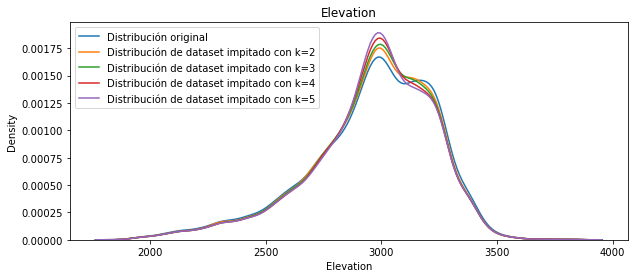

In [53]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.kdeplot(numerics['Elevation'], label="Distribución original")
for k in range(0,4):
    sns.kdeplot(df_knn[k]['Elevation'], label=f"Distribución de dataset impitado con k={k+2}")
plt.title('Elevation')
plt.legend()
plt.show()

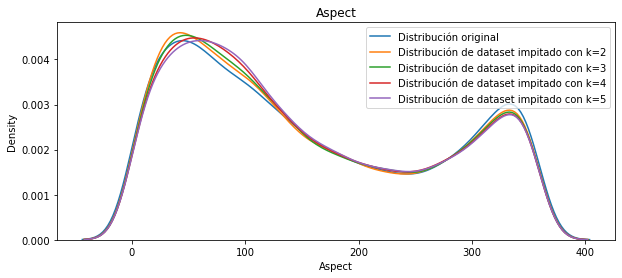

In [54]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.kdeplot(numerics['Aspect'], label="Distribución original")
for k in range(0,4):
    sns.kdeplot(df_knn[k]['Aspect'], label=f"Distribución de dataset impitado con k={k+2}")
plt.title('Aspect')
plt.legend()
plt.show()

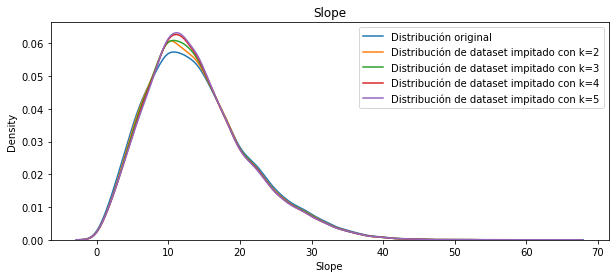

In [55]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.kdeplot(numerics['Slope'], label="Distribución original")
for k in range(0,4):
    sns.kdeplot(df_knn[k]['Slope'], label=f"Distribución de dataset impitado con k={k+2}")
plt.title('Slope')
plt.legend()
plt.show()

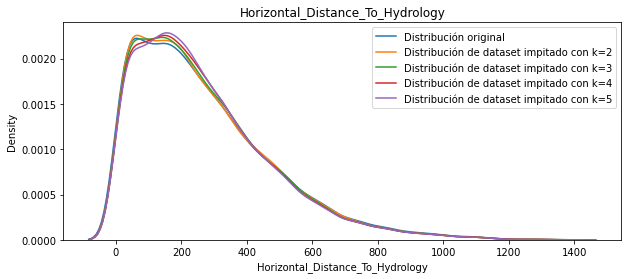

In [56]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.kdeplot(numerics['Horizontal_Distance_To_Hydrology'], label="Distribución original")
for k in range(0,4):
    sns.kdeplot(df_knn[k]['Horizontal_Distance_To_Hydrology'], label=f"Distribución de dataset impitado con k={k+2}")
plt.title('Horizontal_Distance_To_Hydrology')
plt.legend()
plt.show()

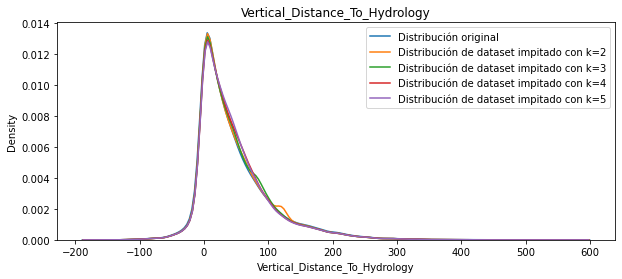

In [57]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.kdeplot(numerics['Vertical_Distance_To_Hydrology'], label="Distribución original")
for k in range(0,4):
    sns.kdeplot(df_knn[k]['Vertical_Distance_To_Hydrology'], label=f"Distribución de dataset impitado con k={k+2}")
plt.title('Vertical_Distance_To_Hydrology')
plt.legend()
plt.show()

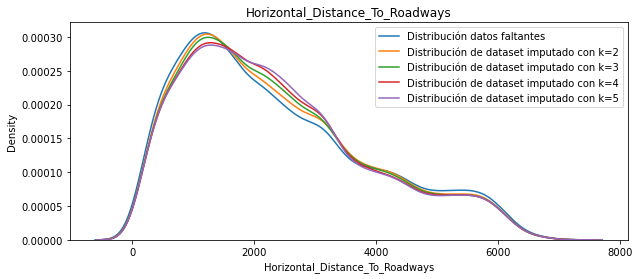

In [58]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.kdeplot(numerics['Horizontal_Distance_To_Roadways'], label="Distribución datos faltantes")
for k in range(0,4):
    sns.kdeplot(df_knn[k]['Horizontal_Distance_To_Roadways'], label=f"Distribución de dataset imputado con k={k+2}")
plt.title('Horizontal_Distance_To_Roadways')
plt.legend()
#plt.savefig("Distcarre-densidad.jpg")
plt.show()

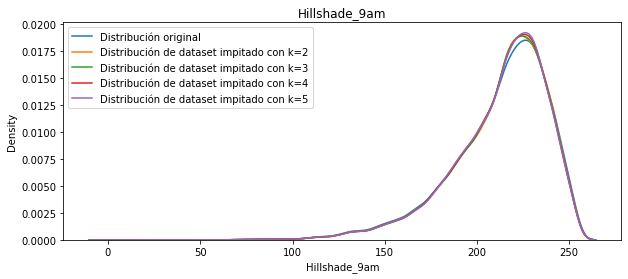

In [59]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.kdeplot(numerics['Hillshade_9am'], label="Distribución original")
for k in range(0,4):
    sns.kdeplot(df_knn[k]['Hillshade_9am'], label=f"Distribución de dataset impitado con k={k+2}")
plt.title('Hillshade_9am')
plt.legend()
plt.show()

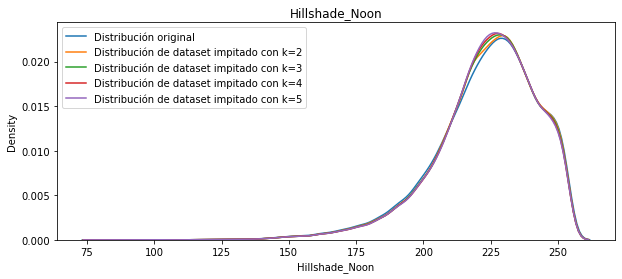

In [60]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.kdeplot(numerics['Hillshade_Noon'], label="Distribución original")
for k in range(0,4):
    sns.kdeplot(df_knn[k]['Hillshade_Noon'], label=f"Distribución de dataset impitado con k={k+2}")
plt.title('Hillshade_Noon')
plt.legend()
plt.show()

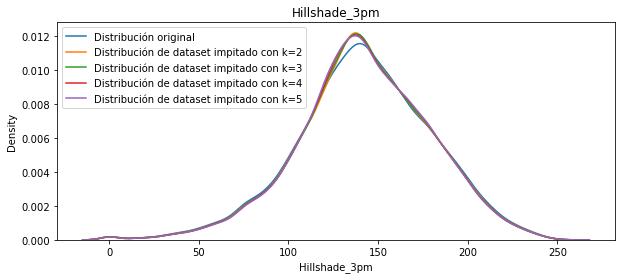

In [61]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.kdeplot(numerics['Hillshade_3pm'], label="Distribución original")
for k in range(0,4):
    sns.kdeplot(df_knn[k]['Hillshade_3pm'], label=f"Distribución de dataset impitado con k={k+2}")
plt.title('Hillshade_3pm')
plt.legend()
plt.show()

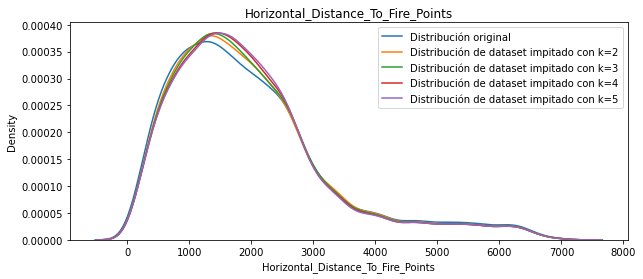

In [62]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.kdeplot(numerics['Horizontal_Distance_To_Fire_Points'], label="Distribución original")
for k in range(0,4):
    sns.kdeplot(df_knn[k]['Horizontal_Distance_To_Fire_Points'], label=f"Distribución de dataset impitado con k={k+2}")
plt.title('Horizontal_Distance_To_Fire_Points')
plt.legend()
plt.show()

En general, los distribuciones no variaron significativamente, excepto en la variable *Horizontal_Distance_To_Roadways* que el k = 2 es mejor. Por lo que, suponiendo que los datos no los conocemos es mejor este valor de k.

In [63]:
imp_mode = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

In [64]:
mode = pd.DataFrame(imp_mode.fit_transform(categorics), columns = categorics.columns)

In [65]:
#dataset_imp = pd.concat([df_knn[0],mode],axis = 1)
#dataset_imp.to_csv('dataset_imp.csv')

Dado que para las variables cualitaivas, para este dataset, la presencia o ausencia de un tipo de suelo o are salvaje, la imputacion solo por moda podria generar resultados sesgados, y dado que solo son 2 posibles estados (0,1) vamos a realizar una imputacion aleatoria para ver si podemos reducir el sesgamiento del dataset.

Código extraido de [Imputación random]('https://stackoverflow.com/questions/36413314/filling-missing-data-by-random-choosing-from-non-missing-values-in-pandas-datafr#:~:text=You%20can%20use%20pandas.,selection%20of%20a%20particular%20column.&text=Where%20column%20is%20the%20column,with%20non%20nan%20values%20randomly').

In [66]:
#def fill_with_random(df2, column):
    #'''Fill `df2`'s column with name `column` with random data based on non-NaN data from `column`'''
    #df = df2.copy()
    #df[column] = df[column].apply(lambda x: np.random.choice(df[column].dropna().values) if np.isnan(x) else x)
    #return df

In [67]:
#for col in categorics_random.columns:
    #categorics_random = fill_with_random(categorics_random,col)

In [68]:
#dataset_impRandom = pd.concat([df_knn[0],categorics_random],axis = 1)
#dataset_impRandom.to_csv('dataset_impRandom.csv')

Finalmente, se utilizó el MSE para verificar cuál de las imputaciones funciono mejor, de lo que se encontró que la mejor forma fue utilizando k = 3 y la moda.

In [69]:
dataset_imp = pd.read_csv('dataset_imp.csv')
dataset_imp = dataset_imp.drop(columns = ['Unnamed: 0','Unnamed: 0.1'])

In [70]:
dataset_impRandom = pd.read_csv('dataset_impRandom.csv')
dataset_impRandom = dataset_impRandom.drop(columns = ['Unnamed: 0','Unnamed: 0.1'])

In [71]:
def mse(data_inicial,data_imp1,data_imp2):
    k = 0
    mse = pd.DataFrame(index = data_inicial.columns, columns = ['MSE_Moda','MSE_Random'])
    for i in data_inicial.columns:
        value1 = ((data_inicial[[i]] - data_imp1[[i]])**2).sum()
        value2 = ((data_inicial[[i]] - data_imp2[[i]])**2).sum()
        mse.iloc[k,0] = value1[0]
        mse.iloc[k,1] =  value2[0]
        k = k + 1
    return mse

In [72]:
mse(dataset,dataset_imp,dataset_impRandom)

,MSE_Moda,MSE_Random
Elevation,254356038.5,254356038.5
Aspect,18338212.25,18338212.25
Slope,80305.5,80305.5
Horizontal_Distance_To_Hydrology,119535143.75,119535143.75
Vertical_Distance_To_Hydrology,9977596.25,9977596.25
Horizontal_Distance_To_Roadways,8180364751.75,8180364751.75
Hillshade_9am,590469.75,590469.75
Hillshade_Noon,472861.75,472861.75
Hillshade_3pm,1119379.5,1119379.5
Horizontal_Distance_To_Fire_Points,5282328741.25,5282328741.25


**Variables escaladas**

El conjunto de datos se escalo debido a que la diferencia entre los valores era demasiado grande y se esperaba que esto ayudara a mejorar la fase de modelamiento.

In [73]:
dataset_imp.Cover_Type = dataset_imp.Cover_Type.astype('category')

In [74]:
Cover_Type = dataset_imp.Cover_Type 
datasetN = dataset_imp.drop(columns = 'Cover_Type')

In [75]:
transformed_dataset = MinMaxScaler().fit_transform(datasetN)

In [76]:
transformed_dataset = pd.DataFrame(transformed_dataset, columns = datasetN.columns)
transformed_dataset = pd.concat([transformed_dataset,Cover_Type], axis = 1)

**4.**  *Clasificación Supervisada.* Durante el análisis se aplicarán tres métodos diferentes de clasificación supervisada, por lo tanto, el concepto de cada uno, la forma de aplicación y los resultados obtenidos en cada uno pueden ser diversos, al final, ustedes verán las bondades y dificultades sobre cada uno de los métodos aplicados.

[Gráfico para score](https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv)

In [77]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))
    
    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + str(val))

    ax.set_title("Grid Search Scores")
    ax.set_xlabel(name_param_1)
    ax.set_ylabel('CV Average Score')
    ax.legend(loc="best")
    ax.grid('on')
    #plt.savefig("grid_search.jpg")

En este paso, se dividio el conjunto de datos imputado en training y test con los datos sin transformación.

In [78]:
X = dataset_imp.drop(columns = ['Cover_Type'])
y = dataset_imp['Cover_Type']

In [79]:
X_trainN, X_testN, y_trainN, y_testN = train_test_split(X, y, test_size=0.3, random_state=1234)

**Artificial Neuronal Network**

Aplicamos el algoritmo de red neuronal artificial para clasificación con 100 capas ocultas y con la función de activación *logistic*, *indentity*, *tanh* y *relu*. 

In [80]:
ANNmodel_LogN = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic',random_state=1,learning_rate_init=.1, verbose=True)
ANNmodel_IndN = MLPClassifier(hidden_layer_sizes=(100,), activation='identity',random_state=1,learning_rate_init=.1, verbose=True)
ANNmodel_TanN = MLPClassifier(hidden_layer_sizes=(100,), activation='tanh',random_state=1,learning_rate_init=.1, verbose=True)
ANNmodel_RelN = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',random_state=1,learning_rate_init=.1, verbose=True)

In [81]:
ANNmodel_LogN.fit(X_trainN,y_trainN)

Iteration 1, loss = 1.39425587
Iteration 2, loss = 1.33367846
Iteration 3, loss = 1.28474113
Iteration 4, loss = 1.30009427
Iteration 5, loss = 1.28449585
Iteration 6, loss = 1.27217942
Iteration 7, loss = 1.27090895
Iteration 8, loss = 1.28386892
Iteration 9, loss = 1.30664776
Iteration 10, loss = 1.30789148
Iteration 11, loss = 1.29409720
Iteration 12, loss = 1.33683203
Iteration 13, loss = 1.31391161
Iteration 14, loss = 1.25956196
Iteration 15, loss = 1.29491733
Iteration 16, loss = 1.28280006
Iteration 17, loss = 1.31346280
Iteration 18, loss = 1.31935234
Iteration 19, loss = 1.33908098
Iteration 20, loss = 1.27406129
Iteration 21, loss = 1.30212750
Iteration 22, loss = 1.30929131
Iteration 23, loss = 1.31075365
Iteration 24, loss = 1.32378926
Iteration 25, loss = 1.28825841
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='logistic', learning_rate_init=0.1, random_state=1,
              verbose=True)

In [82]:
ANNmodel_IndN.fit(X_trainN,y_trainN)

Iteration 1, loss = 21.79276834
Iteration 2, loss = 20.79392365
Iteration 3, loss = 16.32096397
Iteration 4, loss = 8.68934457
Iteration 5, loss = 9.04461081
Iteration 6, loss = 8.67754841
Iteration 7, loss = 8.39006184
Iteration 8, loss = 3.06363066
Iteration 9, loss = 4.47927749
Iteration 10, loss = 22.56974927
Iteration 11, loss = 19.85371320
Iteration 12, loss = 18.04397657
Iteration 13, loss = 17.53561513
Iteration 14, loss = 14.70156884
Iteration 15, loss = 13.70246037
Iteration 16, loss = 14.28486567
Iteration 17, loss = 16.82407137
Iteration 18, loss = 17.00327863
Iteration 19, loss = 11.72317807
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='identity', learning_rate_init=0.1, random_state=1,
              verbose=True)

In [83]:
ANNmodel_TanN.fit(X_trainN,y_trainN)

Iteration 1, loss = 2.09771571
Iteration 2, loss = 1.31191902
Iteration 3, loss = 1.33834853
Iteration 4, loss = 1.34559108
Iteration 5, loss = 1.46630275
Iteration 6, loss = 1.38402630
Iteration 7, loss = 1.37964859
Iteration 8, loss = 1.41642713
Iteration 9, loss = 1.60362248
Iteration 10, loss = 1.34753230
Iteration 11, loss = 1.33720015
Iteration 12, loss = 1.79640750
Iteration 13, loss = 1.57269007
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='tanh', learning_rate_init=0.1, random_state=1,
              verbose=True)

In [84]:
ANNmodel_RelN.fit(X_trainN,y_trainN)

Iteration 1, loss = 4.97309449
Iteration 2, loss = 1.21037145
Iteration 3, loss = 1.20940013
Iteration 4, loss = 1.20951714
Iteration 5, loss = 1.21055570
Iteration 6, loss = 1.20968753
Iteration 7, loss = 1.20998145
Iteration 8, loss = 1.20885041
Iteration 9, loss = 1.20974172
Iteration 10, loss = 1.21046164
Iteration 11, loss = 1.21081087
Iteration 12, loss = 1.21094288
Iteration 13, loss = 1.20996381
Iteration 14, loss = 1.21045800
Iteration 15, loss = 1.21034357
Iteration 16, loss = 1.21035708
Iteration 17, loss = 1.21009879
Iteration 18, loss = 1.20922153
Iteration 19, loss = 1.21035250
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(learning_rate_init=0.1, random_state=1, verbose=True)

**Desicion Tree**

Aplicamos el algoritmo de árboles de desición para clasificación con diferentes profundidades para el árbol (10,20,30,40,50,70,90,120,150) y criterios de evaluación ('gini','entropy'), mediante *Cross-Validation* que nos ayudo a escoger el modelo con mejor score.

In [85]:
tree_param = {'criterion':['gini','entropy'],'max_depth':[10,20,30,40,50,70,90,120,150]}

In [86]:
dt_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_param, verbose=1, cv=10)

In [87]:
dt_cv.fit(X_trainN, y_trainN)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50, 70, 90, 120, 150]},
             verbose=1)

De los parametros, los mejores fueron gini y profundidad de 10.

In [88]:
dt_cv.best_params_['criterion']

'gini'

In [89]:
dt_cv.best_params_['max_depth']

10

Se entreno el algoritmo con los parametros que se encontraron que dan un mejor resultado.

In [90]:
dtN = DecisionTreeClassifier(criterion = dt_cv.best_params_['criterion'], max_depth = dt_cv.best_params_['max_depth'])

In [91]:
dtN.fit(X_trainN,y_trainN)

DecisionTreeClassifier(max_depth=10)

**Linear Discriminant Analysis**

Aplicamos el algoritmo de análisis lineal discriminante para clasificación con diferentes solver, mediante Cross-Validation que nos ayudo a escoger el modelo con mejor score.

In [92]:
lda_param = {'solver':['svd','lsqr']}

In [93]:
lda_cv = GridSearchCV(LinearDiscriminantAnalysis(), lda_param, verbose=1, cv=10)

In [94]:
lda_cv.fit(X_trainN, y_trainN)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr']}, verbose=1)

De los parametros, el mejor fue svd.

In [95]:
lda_cv.best_params_['solver']

'lsqr'

Se entreno el algoritmo con los parametros que se encontraron que dan un mejor resultado.

In [96]:
ldaN = LinearDiscriminantAnalysis(solver = lda_cv.best_params_['solver'])

In [97]:
ldaN.fit(X_trainN, y_trainN)

LinearDiscriminantAnalysis(solver='lsqr')

En este paso, se dividio el conjunto de datos imputado en training y test con los datos escalados.

In [98]:
X = transformed_dataset.drop(columns = ['Cover_Type'])
y = transformed_dataset['Cover_Type']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

**Artificial Neuronal Network**

Aplicamos el algoritmo de red neuronal artificial para clasificación con 100 capas ocultas y con la función de activación *logistic*, *indentity*, *tanh* y *relu*. 

In [100]:
ANNmodel_Log = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic',random_state=1,learning_rate_init=.1, verbose=True)
ANNmodel_Ind = MLPClassifier(hidden_layer_sizes=(100,), activation='identity',random_state=1,learning_rate_init=.1, verbose=True)
ANNmodel_Tan = MLPClassifier(hidden_layer_sizes=(100,), activation='tanh',random_state=1,learning_rate_init=.1, verbose=True)
ANNmodel_Rel = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',random_state=1,learning_rate_init=.1, verbose=True)

In [101]:
ANNmodel_Log.fit(X_train,y_train)

Iteration 1, loss = 0.99242709
Iteration 2, loss = 0.76544704
Iteration 3, loss = 0.71951354
Iteration 4, loss = 0.71268284
Iteration 5, loss = 0.70140371
Iteration 6, loss = 0.69368163
Iteration 7, loss = 0.68134040
Iteration 8, loss = 0.67854606
Iteration 9, loss = 0.67231246
Iteration 10, loss = 0.69079663
Iteration 11, loss = 0.67669912
Iteration 12, loss = 0.66496391
Iteration 13, loss = 0.66573636
Iteration 14, loss = 0.66795118
Iteration 15, loss = 0.66676783
Iteration 16, loss = 0.67175024
Iteration 17, loss = 0.66571361
Iteration 18, loss = 0.66093862
Iteration 19, loss = 0.65613834
Iteration 20, loss = 0.65536798
Iteration 21, loss = 0.65307157
Iteration 22, loss = 0.66203067
Iteration 23, loss = 0.65214816
Iteration 24, loss = 0.64880502
Iteration 25, loss = 0.64999528
Iteration 26, loss = 0.64387584
Iteration 27, loss = 0.64861055
Iteration 28, loss = 0.63969757
Iteration 29, loss = 0.64130790
Iteration 30, loss = 0.64075601
Iteration 31, loss = 0.64162419
Iteration 32, los

MLPClassifier(activation='logistic', learning_rate_init=0.1, random_state=1,
              verbose=True)

In [102]:
ANNmodel_Ind.fit(X_train,y_train)

Iteration 1, loss = 1.26602988
Iteration 2, loss = 0.78654755
Iteration 3, loss = 0.76585649
Iteration 4, loss = 0.78246908
Iteration 5, loss = 0.77261991
Iteration 6, loss = 0.77289729
Iteration 7, loss = 0.77403191
Iteration 8, loss = 0.78609841
Iteration 9, loss = 0.77119766
Iteration 10, loss = 0.78470793
Iteration 11, loss = 0.77418605
Iteration 12, loss = 0.77358273
Iteration 13, loss = 0.78014178
Iteration 14, loss = 0.76950944
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='identity', learning_rate_init=0.1, random_state=1,
              verbose=True)

In [103]:
ANNmodel_Tan.fit(X_train,y_train)

Iteration 1, loss = 1.13545136
Iteration 2, loss = 0.80772047
Iteration 3, loss = 0.77573336
Iteration 4, loss = 0.80222048
Iteration 5, loss = 0.77754889
Iteration 6, loss = 0.77432156
Iteration 7, loss = 0.76318781
Iteration 8, loss = 0.76600006
Iteration 9, loss = 0.79344544
Iteration 10, loss = 0.82921163
Iteration 11, loss = 0.80034725
Iteration 12, loss = 0.76140896
Iteration 13, loss = 0.79215267
Iteration 14, loss = 0.78272532
Iteration 15, loss = 0.79443525
Iteration 16, loss = 0.75952391
Iteration 17, loss = 0.76261076
Iteration 18, loss = 0.79921406
Iteration 19, loss = 0.78467589
Iteration 20, loss = 0.78566619
Iteration 21, loss = 0.76682489
Iteration 22, loss = 0.79394270
Iteration 23, loss = 0.77206573
Iteration 24, loss = 0.79388985
Iteration 25, loss = 0.80761530
Iteration 26, loss = 0.78545701
Iteration 27, loss = 0.79091506
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='tanh', learning_rate_init=0.1, random_state=1,
              verbose=True)

In [104]:
ANNmodel_Rel.fit(X_train,y_train)

Iteration 1, loss = 0.91600654
Iteration 2, loss = 0.75077188
Iteration 3, loss = 0.72672157
Iteration 4, loss = 0.72776121
Iteration 5, loss = 0.71456616
Iteration 6, loss = 0.70557402
Iteration 7, loss = 0.70391919
Iteration 8, loss = 0.70369197
Iteration 9, loss = 0.69809154
Iteration 10, loss = 0.70432547
Iteration 11, loss = 0.70751513
Iteration 12, loss = 0.70212327
Iteration 13, loss = 0.69841256
Iteration 14, loss = 0.69625765
Iteration 15, loss = 0.69972479
Iteration 16, loss = 0.71025357
Iteration 17, loss = 0.70046674
Iteration 18, loss = 0.69812489
Iteration 19, loss = 0.69367264
Iteration 20, loss = 0.69236511
Iteration 21, loss = 0.69893275
Iteration 22, loss = 0.70107815
Iteration 23, loss = 0.69783180
Iteration 24, loss = 0.69914745
Iteration 25, loss = 0.69701481
Iteration 26, loss = 0.70092334
Iteration 27, loss = 0.69829707
Iteration 28, loss = 0.69003543
Iteration 29, loss = 0.69078873
Iteration 30, loss = 0.69003139
Iteration 31, loss = 0.69576985
Iteration 32, los

MLPClassifier(learning_rate_init=0.1, random_state=1, verbose=True)

**Desicion Tree**

Aplicamos el algoritmo de árboles de desición para clasificación con diferentes profundidades para el árbol (10,20,30,40,50,70,90,120,150) y criterios de evaluación ('gini','entropy'), mediante *Cross-Validation* que nos ayudo a escoger el modelo con mejor score.

In [105]:
tree_param = {'criterion':['gini','entropy'],'max_depth':[10,20,30,40,50,70,90,120,150]}

In [106]:
dt_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_param, verbose=1, cv=10)

In [107]:
dt_cv.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50, 70, 90, 120, 150]},
             verbose=1)

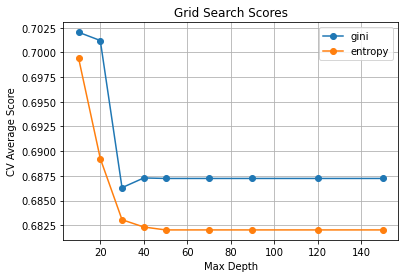

In [108]:
plot_grid_search(dt_cv.cv_results_, tree_param['max_depth'],tree_param['criterion'], 'Max Depth', '')

De los parametros, los mejores fueron gini y profundidad de 10.

In [109]:
dt_cv.best_params_['criterion']

'gini'

In [110]:
dt_cv.best_params_['max_depth']

10

Se entreno el algoritmo con los parametros que  se encontraron que dan un mejor resultado.

In [111]:
dt = DecisionTreeClassifier(criterion = dt_cv.best_params_['criterion'], max_depth = dt_cv.best_params_['max_depth'])

In [112]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

**Linear Discriminant Analysis**

Aplicamos el algoritmo de análisis lineal discriminante para clasificación con diferentes solver, mediante Cross-Validation que nos ayudo a escoger el modelo con mejor score.

In [113]:
lda_param = {'solver':['svd','lsqr']}

In [114]:
lda_cv = GridSearchCV(LinearDiscriminantAnalysis(), lda_param, verbose=1, cv=10)

In [115]:
lda_cv.fit(X_train, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr']}, verbose=1)

De los parametros, el mejor fue svd.

In [116]:
lda_cv.best_params_['solver']

'lsqr'

Se entreno el algoritmo con los parametros que  se encontraron que dan un mejor resultado.

In [117]:
lda = LinearDiscriminantAnalysis(solver = lda_cv.best_params_['solver'])

In [118]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(solver='lsqr')

**5.**   *Evaluación.* Para los tres métodos aplicados debe mostrar la respectiva evaluación y explicar el rendimiento de cada modelo, de igual manera, debe indicar y justificar el modelo elegido, la argumentación debe ser clara y coherente. Adicionalmente, debe presentar de manera clara la comparación entre las tres técnicas de clasificación aplicadas y sus resultados.

**Artificial Neuronal Network**

Función de activación logistic

In [119]:
print('El accuaracy para el conjunto original en el conjunto de entrenamiento es ',
accuracy_score(y_train,ANNmodel_LogN.predict(X_trainN)), 'y para el conjunto de prueba es ', 
      accuracy_score(y_test,ANNmodel_LogN.predict(X_testN)))
print('El accuaracy para el conjunto escalado en el conjunto de entrenamiento es ',
accuracy_score(y_train,ANNmodel_Log.predict(X_train)), 'y para el conjunto de prueba es ', 
      accuracy_score(y_test,ANNmodel_Log.predict(X_test)))

El accuaracy para el conjunto original en el conjunto de entrenamiento es  0.4871895746250307 y para el conjunto de prueba es  0.4885268471776044
El accuaracy para el conjunto escalado en el conjunto de entrenamiento es  0.7457093680845832 y para el conjunto de prueba es  0.7193666819642037


Función de activación indentity

In [120]:
print('El accuaracy para el conjunto original en el conjunto de entrenamiento es ',
accuracy_score(y_train,ANNmodel_IndN.predict(X_trainN)), 'y para el conjunto de prueba es ', 
      accuracy_score(y_test,ANNmodel_IndN.predict(X_testN)))
print('El accuaracy para el conjunto escalado en el conjunto de entrenamiento es ',
accuracy_score(y_train,ANNmodel_Ind.predict(X_train)), 'y para el conjunto de prueba es ', 
      accuracy_score(y_test,ANNmodel_Ind.predict(X_test)))

El accuaracy para el conjunto original en el conjunto de entrenamiento es  0.5871158101794934 y para el conjunto de prueba es  0.5836392840752639
El accuaracy para el conjunto escalado en el conjunto de entrenamiento es  0.688861568723875 y para el conjunto de prueba es  0.6882744378155117


Función de activación tanh

In [121]:
print('El accuaracy para el conjunto original en el conjunto de entrenamiento es ',
accuracy_score(y_train,ANNmodel_TanN.predict(X_trainN)), 'y para el conjunto de prueba es ', 
      accuracy_score(y_test,ANNmodel_TanN.predict(X_testN)))
print('El accuaracy para el conjunto escalado en el conjunto de entrenamiento es ',
accuracy_score(y_train,ANNmodel_Tan.predict(X_train)), 'y para el conjunto de prueba es ', 
      accuracy_score(y_test,ANNmodel_Tan.predict(X_test)))

El accuaracy para el conjunto original en el conjunto de entrenamiento es  0.4871895746250307 y para el conjunto de prueba es  0.4885268471776044
El accuaracy para el conjunto escalado en el conjunto de entrenamiento es  0.6629456601917876 y para el conjunto de prueba es  0.6547728315741166


Función de activación relu

In [122]:
print('El accuaracy para el conjunto original en el conjunto de entrenamiento es ',
accuracy_score(y_train,ANNmodel_RelN.predict(X_trainN)), 'y para el conjunto de prueba es ', 
      accuracy_score(y_test,ANNmodel_RelN.predict(X_testN)))
print('El accuaracy para el conjunto escalado en el conjunto de entrenamiento es ',
accuracy_score(y_train,ANNmodel_Rel.predict(X_train)), 'y para el conjunto de prueba es ', 
      accuracy_score(y_test,ANNmodel_Rel.predict(X_test)))

El accuaracy para el conjunto original en el conjunto de entrenamiento es  0.4871895746250307 y para el conjunto de prueba es  0.4885268471776044
El accuaracy para el conjunto escalado en el conjunto de entrenamiento es  0.7125645438898451 y para el conjunto de prueba es  0.7066314823313447


**Decision Tree**

In [123]:
print('El accuaracy para el conjunto original en el conjunto de entrenamiento es ',
accuracy_score(y_train,dtN.predict(X_trainN)), 'y para el conjunto de prueba es ', 
      accuracy_score(y_test,dtN.predict(X_testN)))
print('El accuaracy para el conjunto escalado en el conjunto de entrenamiento es ',
accuracy_score(y_train,dt.predict(X_train)), 'y para el conjunto de prueba es ', 
      accuracy_score(y_test,dt.predict(X_test)))

El accuaracy para el conjunto original en el conjunto de entrenamiento es  0.7687238750922055 y para el conjunto de prueba es  0.7195961450206517
El accuaracy para el conjunto escalado en el conjunto de entrenamiento es  0.7688222276862552 y para el conjunto de prueba es  0.7191372189077558


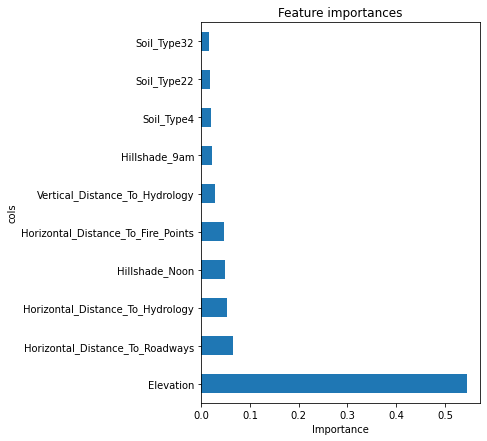

In [124]:
df = pd.DataFrame({'cols':X_train.columns.values, 'imp':dt.feature_importances_}).sort_values('imp', ascending=False)
df[:10].plot('cols', 'imp', 'barh', figsize=(5,7), legend=False)
plt.xlabel('Importance')
plt.title('Feature importances')
plt.show()

**Linear Discriminant Analysis**

In [125]:
print('El accuaracy para el conjunto original en el conjunto de entrenamiento es ',
accuracy_score(y_train,ldaN.predict(X_trainN)), 'y para el conjunto de prueba es ', 
      accuracy_score(y_test,ldaN.predict(X_testN)))
print('El accuaracy para el conjunto escalado en el conjunto de entrenamiento es ',
accuracy_score(y_train,lda.predict(X_train)), 'y para el conjunto de prueba es ', 
      accuracy_score(y_test,lda.predict(X_test)))

El accuaracy para el conjunto original en el conjunto de entrenamiento es  0.6620604868453406 y para el conjunto de prueba es  0.6603946764570904
El accuaracy para el conjunto escalado en el conjunto de entrenamiento es  0.6620604868453406 y para el conjunto de prueba es  0.6603946764570904


**6.**  *Clasificación No Supervisada.* Aplicar dos técnicas de clasificación no supervisada sobre el dataset inicial o imputado (en caso de tener faltantes el original). Como resultado, debe explicar lo encontrado en el conjunto de datos y la interpretación a los hallazgos. En caso de tener valores faltantes en su dataset original recuerde que primero debe hacer imputación.

Se genero el conjunto de datos para la clasificación no supervisada.

In [126]:
dataset_uns = dataset_imp.drop(columns = 'Cover_Type')
Cover_Type = dataset_imp['Cover_Type']

**K-Means**

Para el algoritmo K-Means, se utilizó el método del codo para encontrar el mejor k por medio de la inercia de cada clasificación no supervisada.

Código extraido de [K-Means](https://realpython.com/k-means-clustering-python/)

In [127]:
data = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(dataset_uns)
    data.append([kmeans.inertia_])

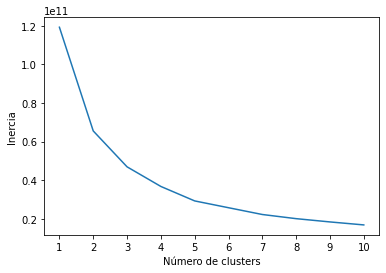

In [128]:
plt.plot(range(1, 11), data)
plt.xticks(range(1, 11))
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
#plt.savefig("codo.jpg")
plt.show()

In [129]:
#kmeans = KMeans(n_clusters = 3).fit(dataset_uns)
#labels = pd.DataFrame(kmeans.predict(dataset_uns), columns = ['cluster'])
#dataset_WT = pd.concat([dataset_uns,Cover_Type,labels],axis = 1)
#dataset_WT.cluster = dataset_WT.cluster.astype('category')
#dataset_WT.to_csv('dataset_kmeans.csv')

El k seleccionado fue 3, por lo que se guardo la base de datos con el cluster de cada observación y el tipo de cobertura forestal original.

In [130]:
dataset_WT = pd.read_csv('dataset_kmeans.csv')

In [131]:
dataset_WT.cluster = dataset_WT.cluster.astype('category')

Se realizaron boxplot de las variables númericas y se conservaron las que permitieron ver alguna diferencia entre clusters. La distancia horizontal a la carretera es diferente para el cluster 0, aunque en los otros es muy parecida. La distancia horizontal a puntos de fuego es diferente para el cluster 1, aunque en los otros es muy parecida. 

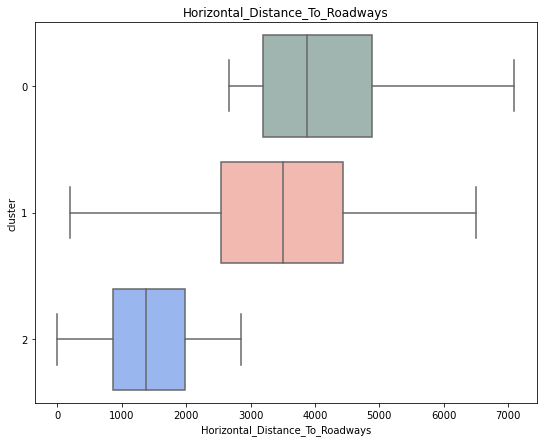

In [132]:
plt.figure(figsize=(9,7))
sns.boxplot(y = 'cluster', x = 'Horizontal_Distance_To_Roadways', data = dataset_WT, palette = ['#9CB8B2','#FCB1A4',
            '#8BB3FC']).set(title='Horizontal_Distance_To_Roadways')
#plt.savefig("kmeanshr.jpg")
plt.show()

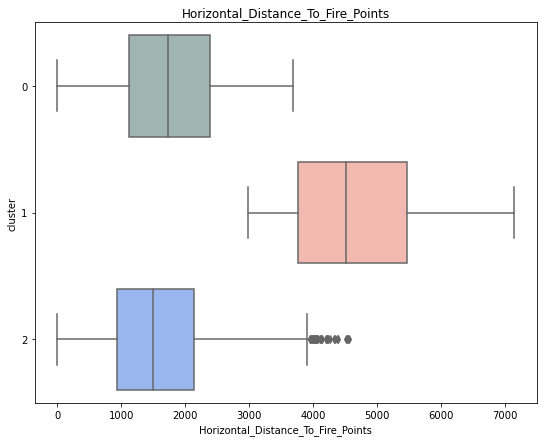

In [133]:
plt.figure(figsize=(9,7))
sns.boxplot(y = 'cluster', x = 'Horizontal_Distance_To_Fire_Points', data = dataset_WT, palette = ['#9CB8B2','#FCB1A4',
            '#8BB3FC']).set(title='Horizontal_Distance_To_Fire_Points')
#plt.savefig("kmeanshf.jpg")
plt.show()

In [134]:
for i in range(11,55):
    dataset_WT.iloc[:,i] = dataset_WT.iloc[:,i].astype('category')

In [135]:
data = dataset_WT.groupby(by = ['Wilderness_Area1','cluster'], group_keys=False).size().reset_index()
data = data[data.Wilderness_Area1 == 1].drop(columns = ['Wilderness_Area1'])
data.columns = ['cluster','Wilderness_Area1'] 

In [136]:
for i in range(2,5):
    name = 'Wilderness_Area'+str(i)
    base = dataset_WT.groupby(by = [name,'cluster'], group_keys=False).size().reset_index()
    base = base[base[name] == 1].drop(columns = [name])
    base.columns = ['cluster',name] 
    data = data.merge(base,how = 'outer')

In [137]:
data = data.sort_values(by = 'cluster', ascending = True)
data = data.drop(columns = ['cluster'])
data.index = [0,1,2]

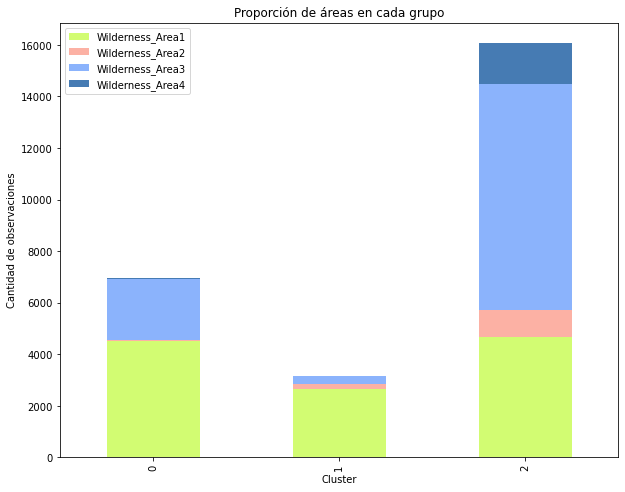

In [138]:
data.plot(kind="bar",stacked=True,figsize=(10,8),color = ['#D2FC72','#FCB1A4',
            '#8BB3FC','#467BB3'],title = 'Proporción de áreas en cada grupo', xlabel = 'Cluster',
          ylabel = 'Cantidad de observaciones')
plt.show()

Esta es la distribución de las categorias originales en los clusters, estan se concentran en el cluster 0.

In [139]:
data = dataset_WT.groupby(by = ['Cover_Type','cluster'], group_keys=False).size().reset_index()
data.columns = ['Cover_Type','cluster', 'cantidad']
print(data[data.cluster == 0].sort_values('cantidad', ascending=False))
print(data[data.cluster == 1].sort_values('cantidad', ascending=False))
print(data[data.cluster == 2].sort_values('cantidad', ascending=False))

    Cover_Type cluster  cantidad
3          2.0       0      3648
0          1.0       0      3597
18         7.0       0       332
6          3.0       0        54
12         5.0       0        33
15         6.0       0        22
9          4.0       0         3
    Cover_Type cluster  cantidad
4          2.0       1      2011
1          1.0       1      1277
19         7.0       1       194
13         5.0       1        13
7          3.0       1         1
16         6.0       1         1
10         4.0       1         0
    Cover_Type cluster  cantidad
5          2.0       2      8506
2          1.0       2      5718
8          3.0       2      1733
17         6.0       2       845
20         7.0       2       500
14         5.0       2       429
11         4.0       2       134


**Hierarchical Clustering**

Para el algoritmo Hierarchical Clustering, se utilizó el método del ward con la distancia euclidiana porque se encontró un documento que utilizó esto para un conjunto similar en Estados Unidos.

Código extraido de [hierarchical clustering](https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/)

Inicialmente, se corrio para observar el dendograma y ver que número de clusters podría ser indicado.

In [140]:
#hierarchical = shc.linkage(dataset_uns, method = 'ward')

In [141]:
#plt.figure(figsize=(10, 7))  
#plt.title('Dendrograms')  
#dend = shc.dendrogram(hierarchical)
#plt.axhline(y=150000, color='r', linestyle='--')
#plt.savefig("dendograma.jpg")

In [142]:
#cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward') 

In [143]:
#groups = cluster.fit_predict(dataset_uns)

In [144]:
#data = pd.concat([dataset_uns, Cover_Type, pd.DataFrame(groups, columns = [cluster])],axis = 1) 

In [145]:
#data.to_csv('dataset_hclusters.csv')

Luego, se corrio con ese número para enontrar el número de cluster para cada observación.

In [146]:
dataset_hcluster = pd.read_csv('dataset_hclusters.csv')

In [147]:
dataset_hcluster.cluster = dataset_hcluster.cluster.astype('category')

Se realizaron boxplot de las variables númericas y se conservaron las que permitieron ver alguna diferencia entre clusters. La distancia horizontal a la carretera es diferente para cada cluster, el promedio es menor para cluster 1 y 2, media para cluster 4 y mayor para cluster 0 y 3. La distancia horizontal a puntos de fuego es diferente para cada cluster, el promedio es menor para cluster 2 y 4, media para cluster 0 y 1 y mayor para cluster 3.

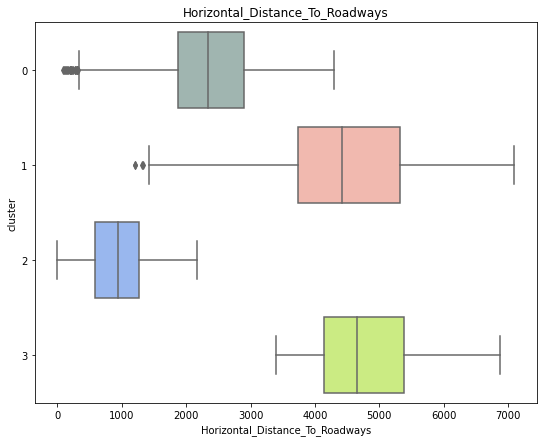

In [148]:
plt.figure(figsize=(9,7))
sns.boxplot(y = 'cluster', x = 'Horizontal_Distance_To_Roadways', data = dataset_hcluster, palette = ['#9CB8B2','#FCB1A4',
            '#8BB3FC','#D2FC72','#FC8B72']).set(title='Horizontal_Distance_To_Roadways')
#plt.savefig("hclusterhr.jpg")
plt.show()

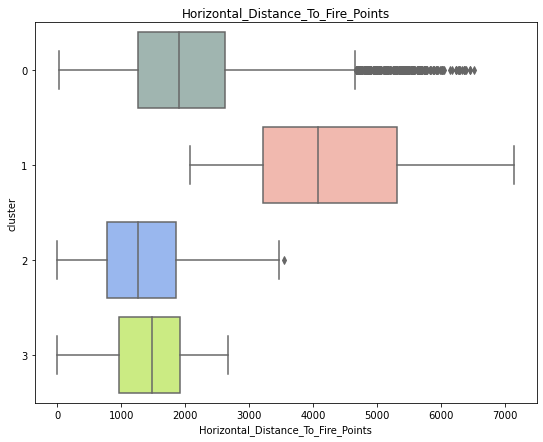

In [149]:
plt.figure(figsize=(9,7))
sns.boxplot(y = 'cluster', x = 'Horizontal_Distance_To_Fire_Points', data = dataset_hcluster, palette = ['#9CB8B2','#FCB1A4',
            '#8BB3FC','#D2FC72','#FC8B72']).set(title='Horizontal_Distance_To_Fire_Points')
#plt.savefig("hclusterhf.jpg")
plt.show()

In [150]:
for i in range(11,55):
    dataset_hcluster.iloc[:,i] = dataset_hcluster.iloc[:,i].astype('category')

In [151]:
data = dataset_hcluster.groupby(by = ['Wilderness_Area1','cluster'], group_keys=False).size().reset_index()
data = data[data.Wilderness_Area1 == 1].drop(columns = ['Wilderness_Area1'])
data.columns = ['cluster','Wilderness_Area1'] 

In [152]:
for i in range(2,5):
    name = 'Wilderness_Area'+str(i)
    base = dataset_hcluster.groupby(by = [name,'cluster'], group_keys=False).size().reset_index()
    base = base[base[name] == 1].drop(columns = [name])
    base.columns = ['cluster',name] 
    data = data.merge(base,how = 'outer')

In [153]:
data = data.sort_values(by = 'cluster', ascending = True)
data = data.drop(columns = ['cluster'])
data.index = [0,1,2,3]

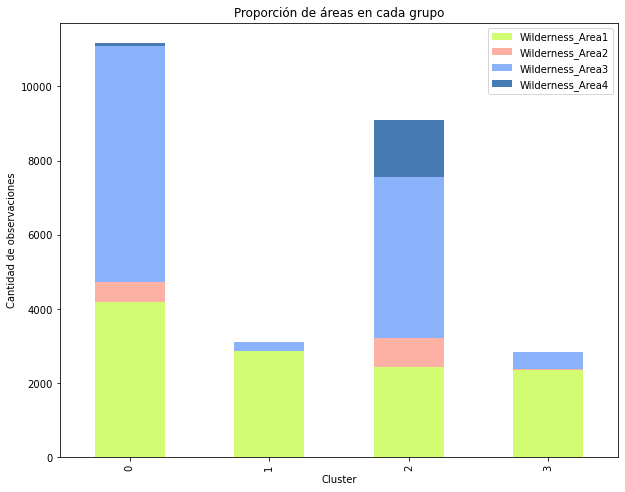

In [154]:
data.plot(kind="bar",stacked=True,figsize=(10,8),color = ['#D2FC72','#FCB1A4',
            '#8BB3FC','#467BB3'],title = 'Proporción de áreas en cada grupo', xlabel = 'Cluster',
          ylabel = 'Cantidad de observaciones')
plt.show()

Esta es la distribución de las categorias originales en los clusters, el tipo 3, 4, 5 y 6 se concentra en el cluster 2, el tipo 7 se concentra en 1 y los restantes no tienen un patrón.

In [155]:
data = dataset_hcluster.groupby(by = ['Cover_Type','cluster'], group_keys=False).size().reset_index()
data.columns = ['Cover_Type','cluster', 'cantidad']
print(data[data.cluster == 0].sort_values('cantidad', ascending=False))
print(data[data.cluster == 1].sort_values('cantidad', ascending=False))
print(data[data.cluster == 2].sort_values('cantidad', ascending=False))
print(data[data.cluster == 3].sort_values('cantidad', ascending=False))

    Cover_Type cluster  cantidad
4          2.0       0      5958
0          1.0       0      5209
24         7.0       0       554
8          3.0       0       277
16         5.0       0       199
20         6.0       0       187
12         4.0       0         4
    Cover_Type cluster  cantidad
5          2.0       1      1987
1          1.0       1      1248
25         7.0       1       208
17         5.0       1         4
13         4.0       1         1
9          3.0       1         0
21         6.0       1         0
    Cover_Type cluster  cantidad
6          2.0       2      4756
2          1.0       2      2572
10         3.0       2      1504
22         6.0       2       679
18         5.0       2       252
26         7.0       2       193
14         4.0       2       132
    Cover_Type cluster  cantidad
3          1.0       3      1563
7          2.0       3      1464
27         7.0       3        71
19         5.0       3        20
11         3.0       3         7
23        

**7.** *Gráficos Interactivos.* Su cuadernillo debe tener al menos dos gráficos interactivos (widgets) para presentar visualmente y en tiempo real algún efecto luego de ajustar en la interfaz gráfica parámetro(s) para algún método de clasificación asignado.

**Gráfico Interactivo para Decision Tree**

Muestra como cambia el arból al cambiar algunos de sus parámetros.

Código extraido de [Arból interactivo](https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084)

In [156]:
feature_cols = X.columns

In [157]:
def one_DT(critVal, splitVal, mx_depth, min_split, min_leaf=0.2):
    estimator = DecisionTreeClassifier(random_state = 0, criterion = critVal, splitter = splitVal, max_depth = mx_depth, min_samples_split=min_split, min_samples_leaf=min_leaf)
    
    estimator.fit(X, y)
    graph = graphviz.Source(export_graphviz(estimator, out_file=None, feature_names=feature_cols, class_names= dataset_miss.Cover_Type.unique().astype('str'), filled = True))

    display(SVG(graph.pipe(format='svg')))
    return estimator

In [158]:
interObject=interactive(one_DT 
   , critVal = ["gini", "entropy"]
   , splitVal = ["best", "random"]
   , mx_depth= list(range(2,30,2))
   , min_split=(0.1,1)
   , min_leaf=(0.1,0.5))
display(interObject)

interactive(children=(Dropdown(description='critVal', options=('gini', 'entropy'), value='gini'), Dropdown(des…

**Gráfico interactivo para Artificial Neuronal Network**

Muestra como cambia la predicción según la función de activación.

In [159]:
def prepareData(Elevation, Aspect, Slope, HDTH, VDTH, HDTR, Hill9, HillN, Hill3, HTFP, WildAreas, SoilTypes):
    dato = [0.0 for x in range(54)]
    dato[0]= Elevation
    dato[1]= Aspect
    dato[2]= Slope
    dato[3]= HDTH
    dato[4]= VDTH
    dato[5]= HDTR
    dato[6]= Hill9
    dato[7]= HillN
    dato[8]= Hill3
    dato[9]= HTFP
    listaWildAreas= list(map(int,WildAreas.split(",")))
    for i in listaWildAreas:
        dato[9+i]= 1.0
        
    listaSoilTypes= list(map(int,SoilTypes.split(",")))
    for i in listaSoilTypes:
        dato[13+i]= 1.0
    return dato

In [160]:
def BarChart(Elevation, Aspect, Slope, HDTH, VDTH, HDTR, Hill9, HillN, Hill3, HTFP, WildAreas, SoilTypes, modelToUse):
    dato = prepareData(Elevation, Aspect, Slope, HDTH, VDTH, HDTR, Hill9, HillN, Hill3, HTFP, WildAreas, SoilTypes)
    info = pd.Series(dato,index=X.columns)
    info = [info]
    
    if(modelToUse == "logistic"):
        data = ANNmodel_Log.predict_proba(info)
    if(modelToUse == "identity"):
        data = ANNmodel_Ind.predict_proba(info)
    if(modelToUse == "tanh"):
        data = ANNmodel_Tan.predict_proba(info)
    if(modelToUse == "relu"):
        data = ANNmodel_Rel.predict_proba(info)

    labels = ['CoverType 1', 'CoverType 2', 'CoverType 3', 'CoverType 4', 'CoverType 5', 'CoverType 6', 'CoverType 7']
    colors = sns.color_palette('pastel')[0:5]
    plt.figure(figsize=(14,6))
    plt.bar(labels,data[0])
    plt.show()

In [161]:
interObject=interactive(BarChart 
   , Elevation = (0.1,1,0.000001)
   , Aspect = (0.1,1,0.000001)
   , Slope= (0.1,1,0.000001)
   , HDTH=(0.1,1,0.000001)
   , VDTH=(0.1,1,0.000001)
   , HDTR=(0.1,1,0.000001)
   , Hill9=(0.1,1,0.000001)
   , HillN=(0.1,1,0.000001)
   , Hill3=(0.1,1,0.000001)
   , HTFP=(0.1,1,0.000001)
   , WildAreas= "1,2"
   , SoilTypes= "1,2,3,4"
   , modelToUse= ["logistic", "identity", "tanh", "relu"])

In [162]:
display(interObject)

interactive(children=(FloatSlider(value=0.5499999999999999, description='Elevation', max=1.0, min=0.1, step=1e…